In [1]:
import csv
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import display, Image

# read csv into dict
# cols are name, pubchemid, inchikey, inchikey (chem trans service), diff, inchi, isomeric smiles, smiles
# require the inchikey to be > 2 to filter any NA's
with open('final-chems.csv', 'rU') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # skip header
    name_map = {store[0]:store[1:] for store in reader if len(store[2]) > 2}

Now that we have our chemicals, let's grid all of them out.

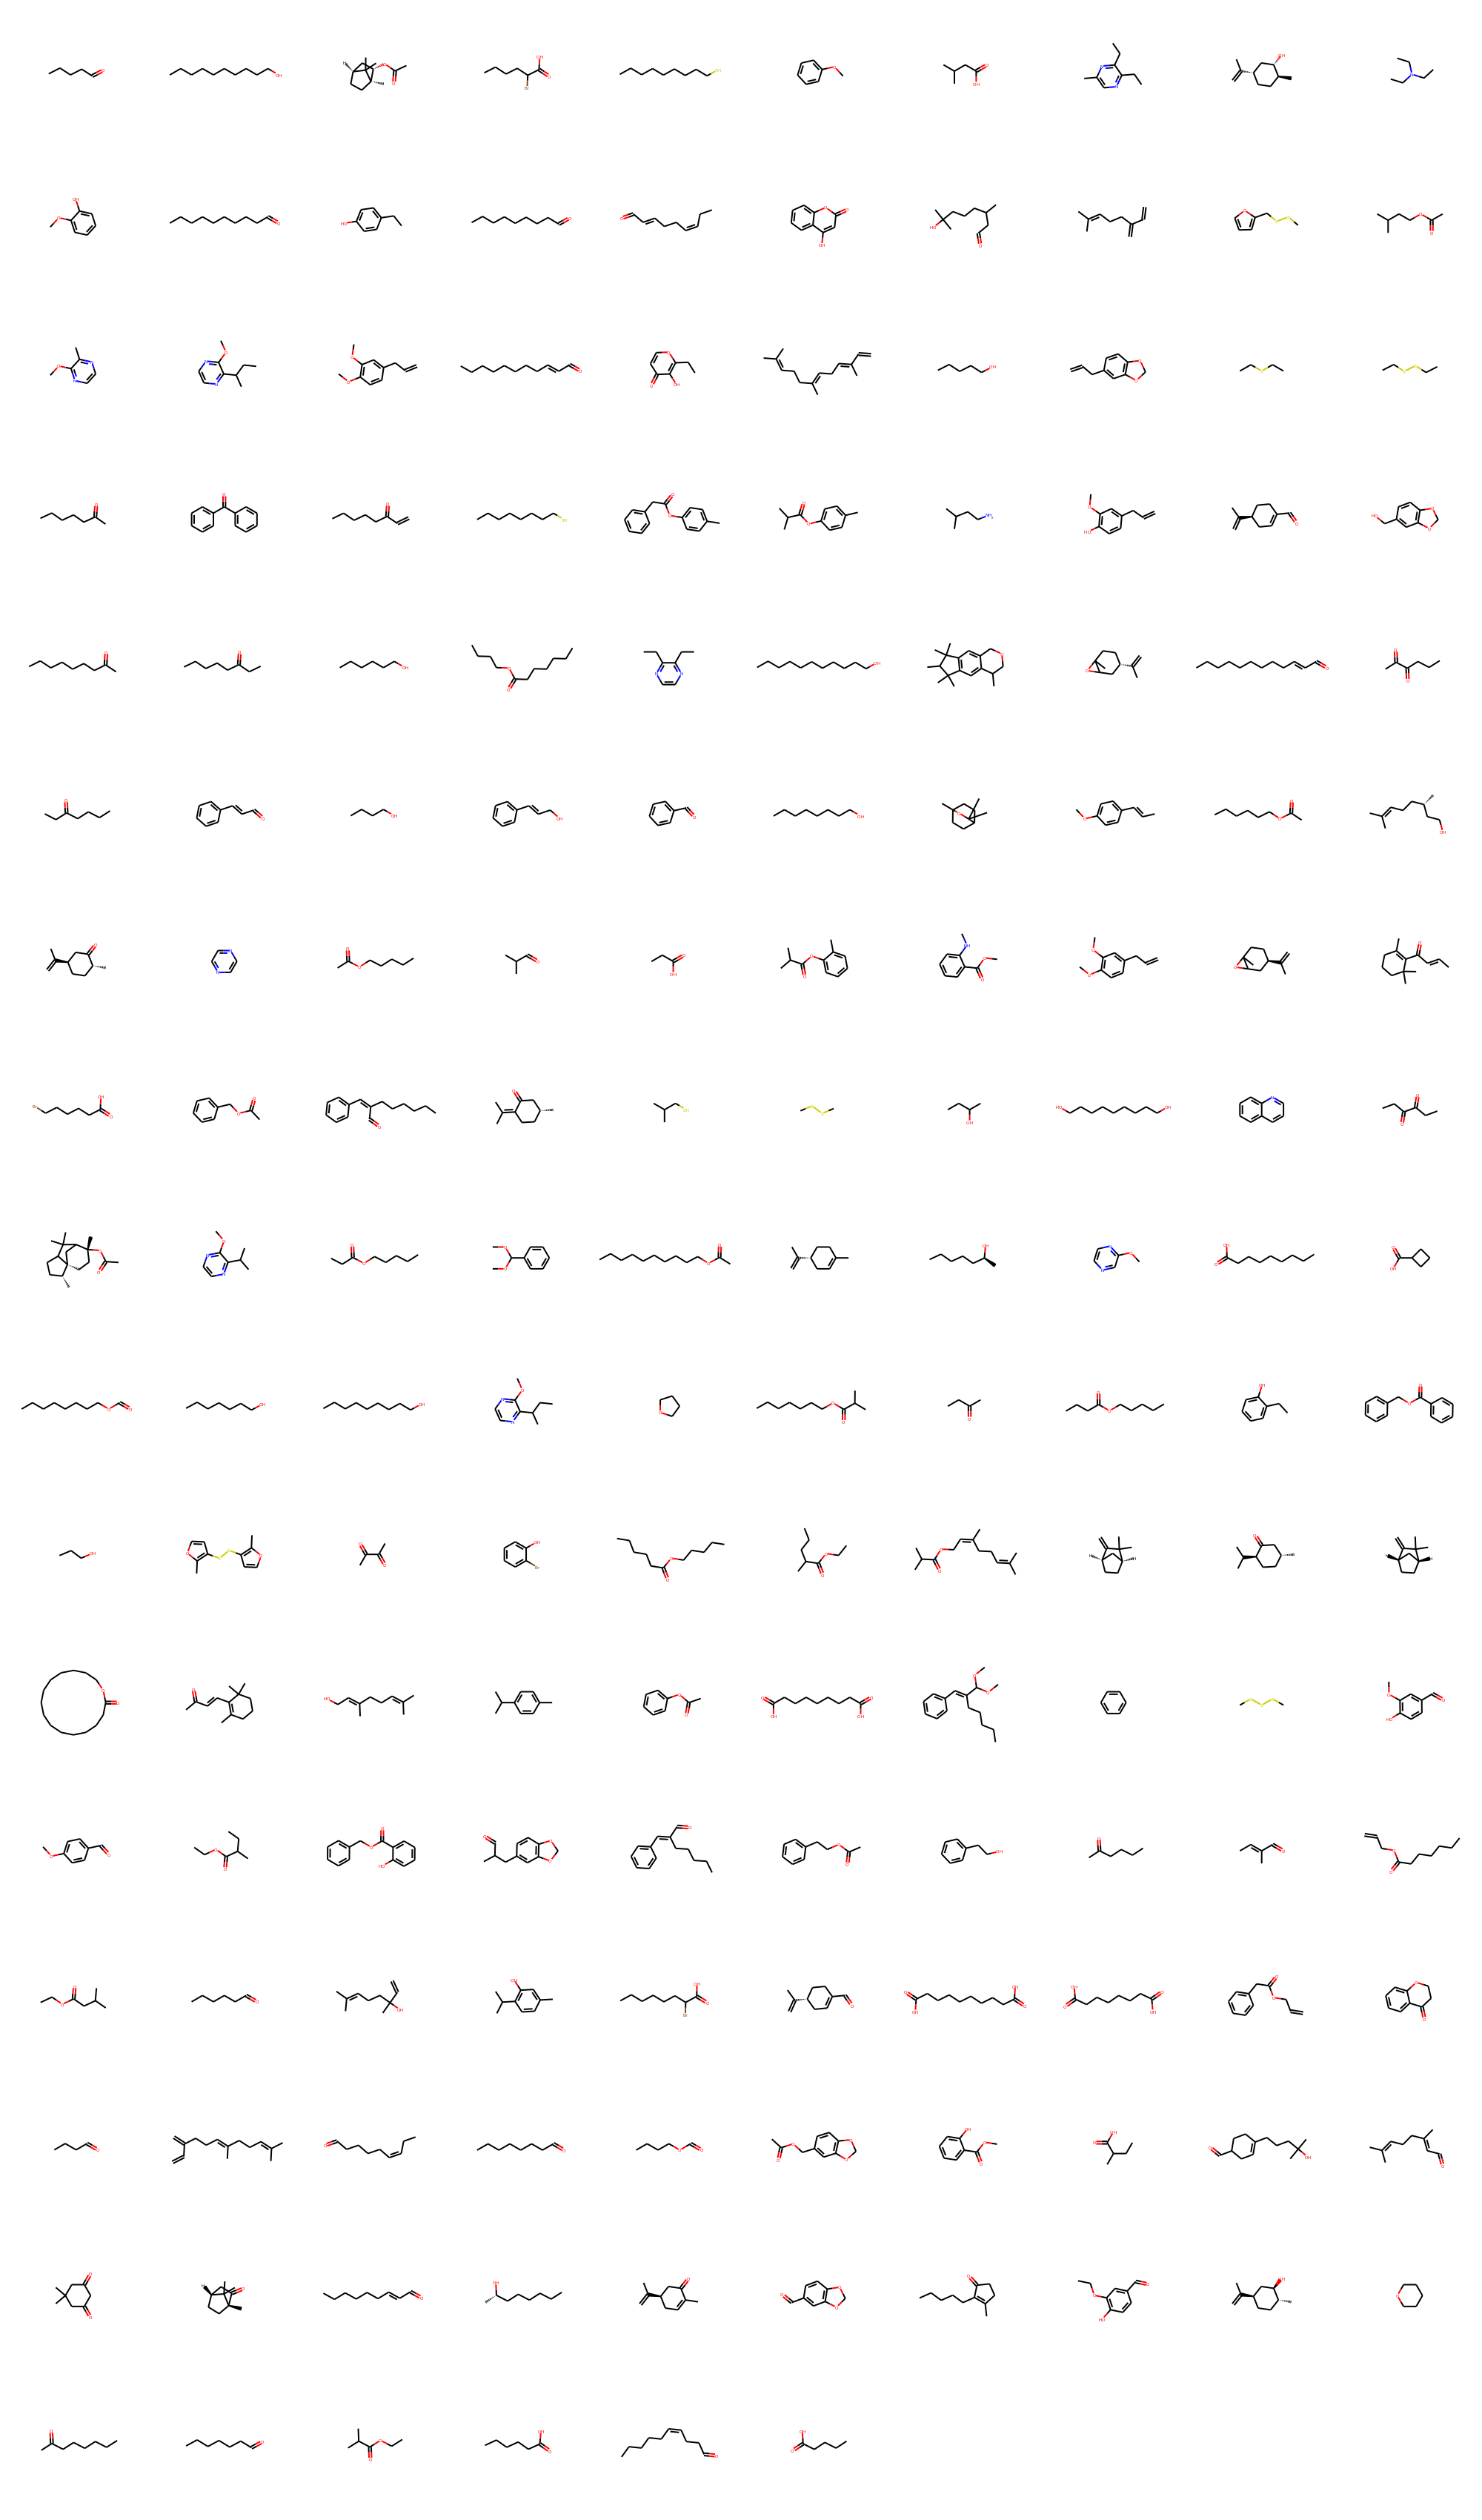

In [2]:
chem_names, chem_images = zip(*[(key, Chem.inchi.MolFromInchi(value[4])) for key, value in name_map.items()])
Draw.MolsToGridImage(chem_images, molsPerRow=10,  maxMols=200)

Load the OR's from Rishi and plot out the chemicals for each one

In [5]:
or_chems = defaultdict(list)
with open('./ors-inchi-rishi.csv', 'rU') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # skip header
    for line in reader:
        or_chems[line[0]].append((line[1], line[4], line[2]))

23_1_2


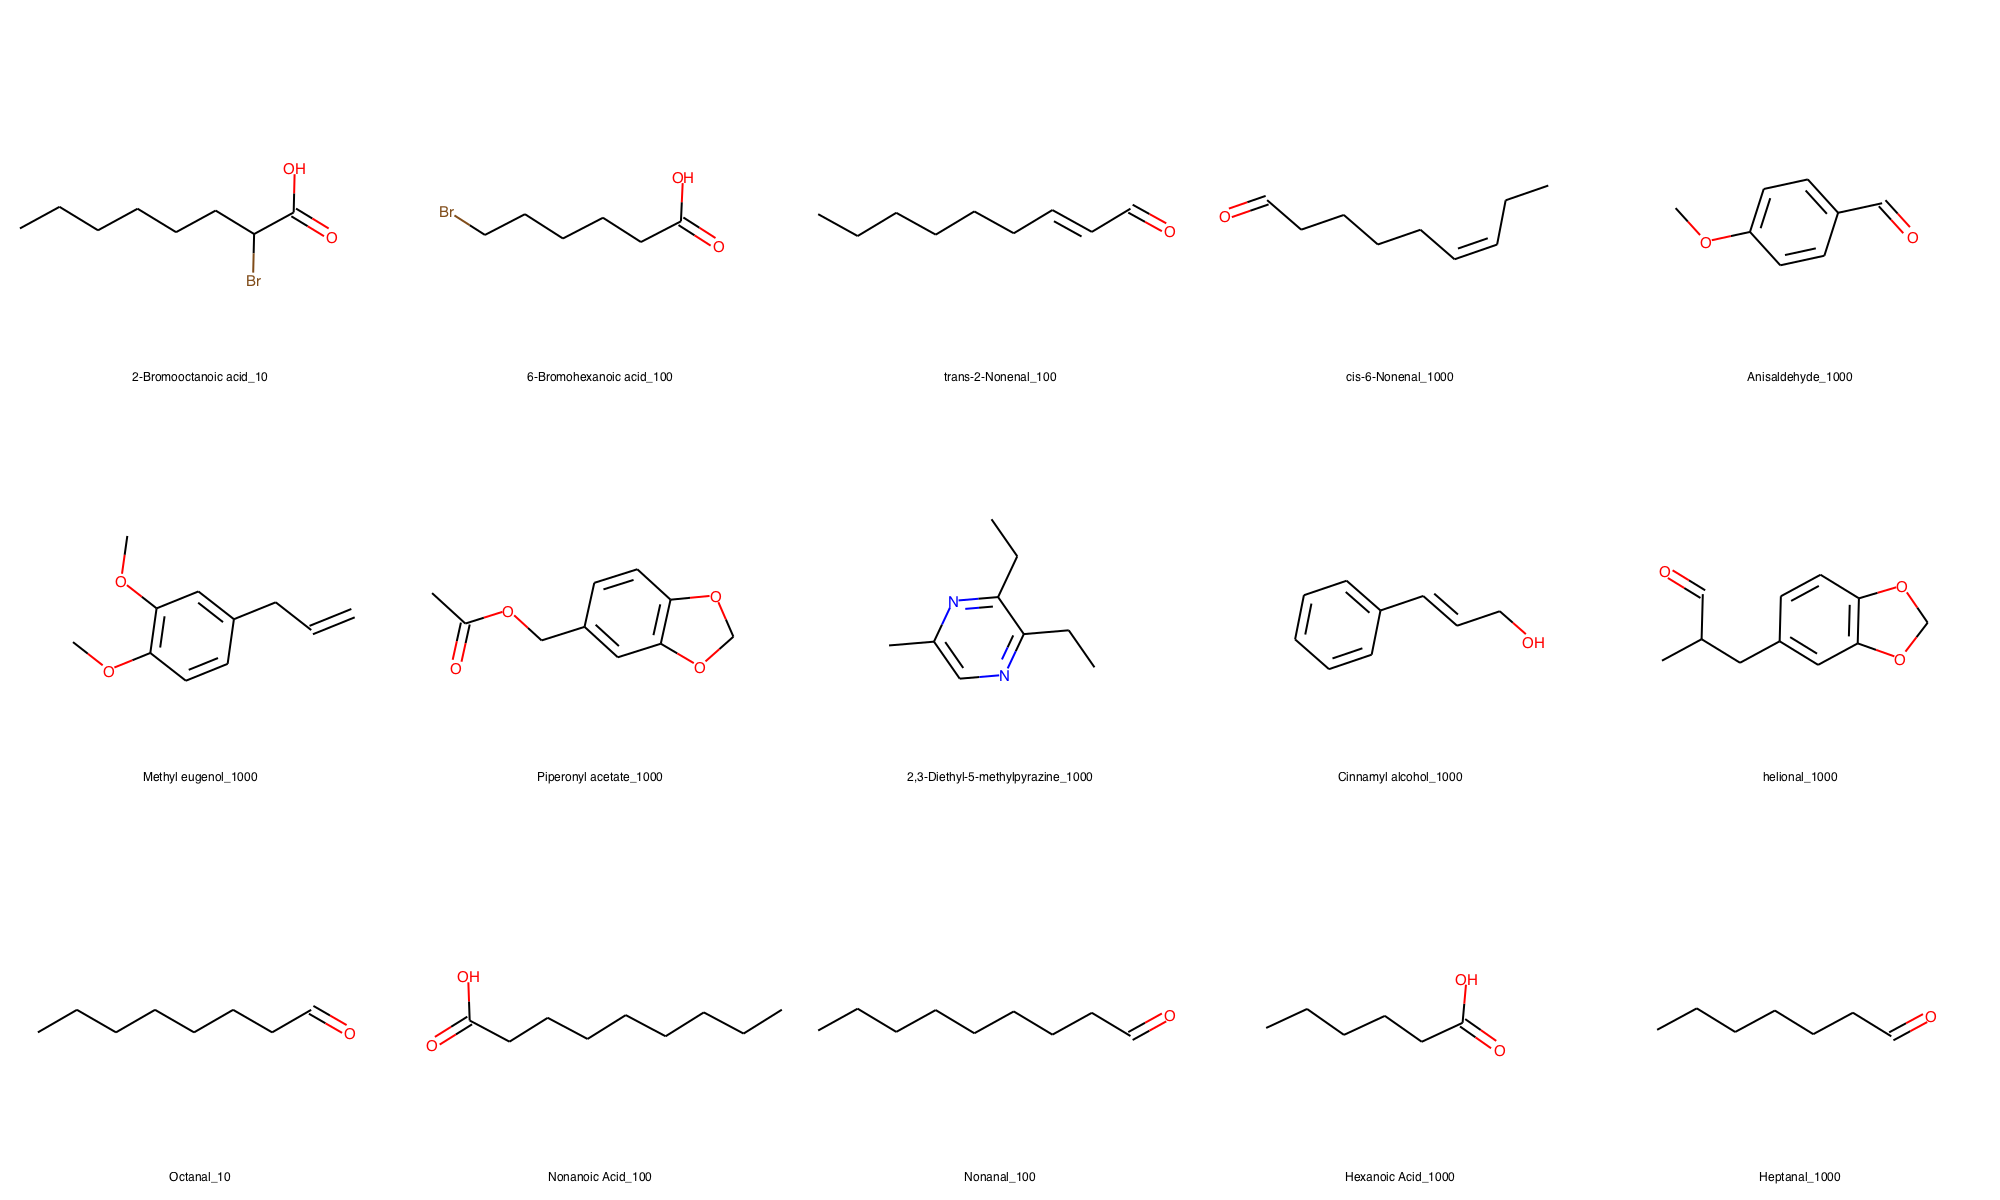

120_1


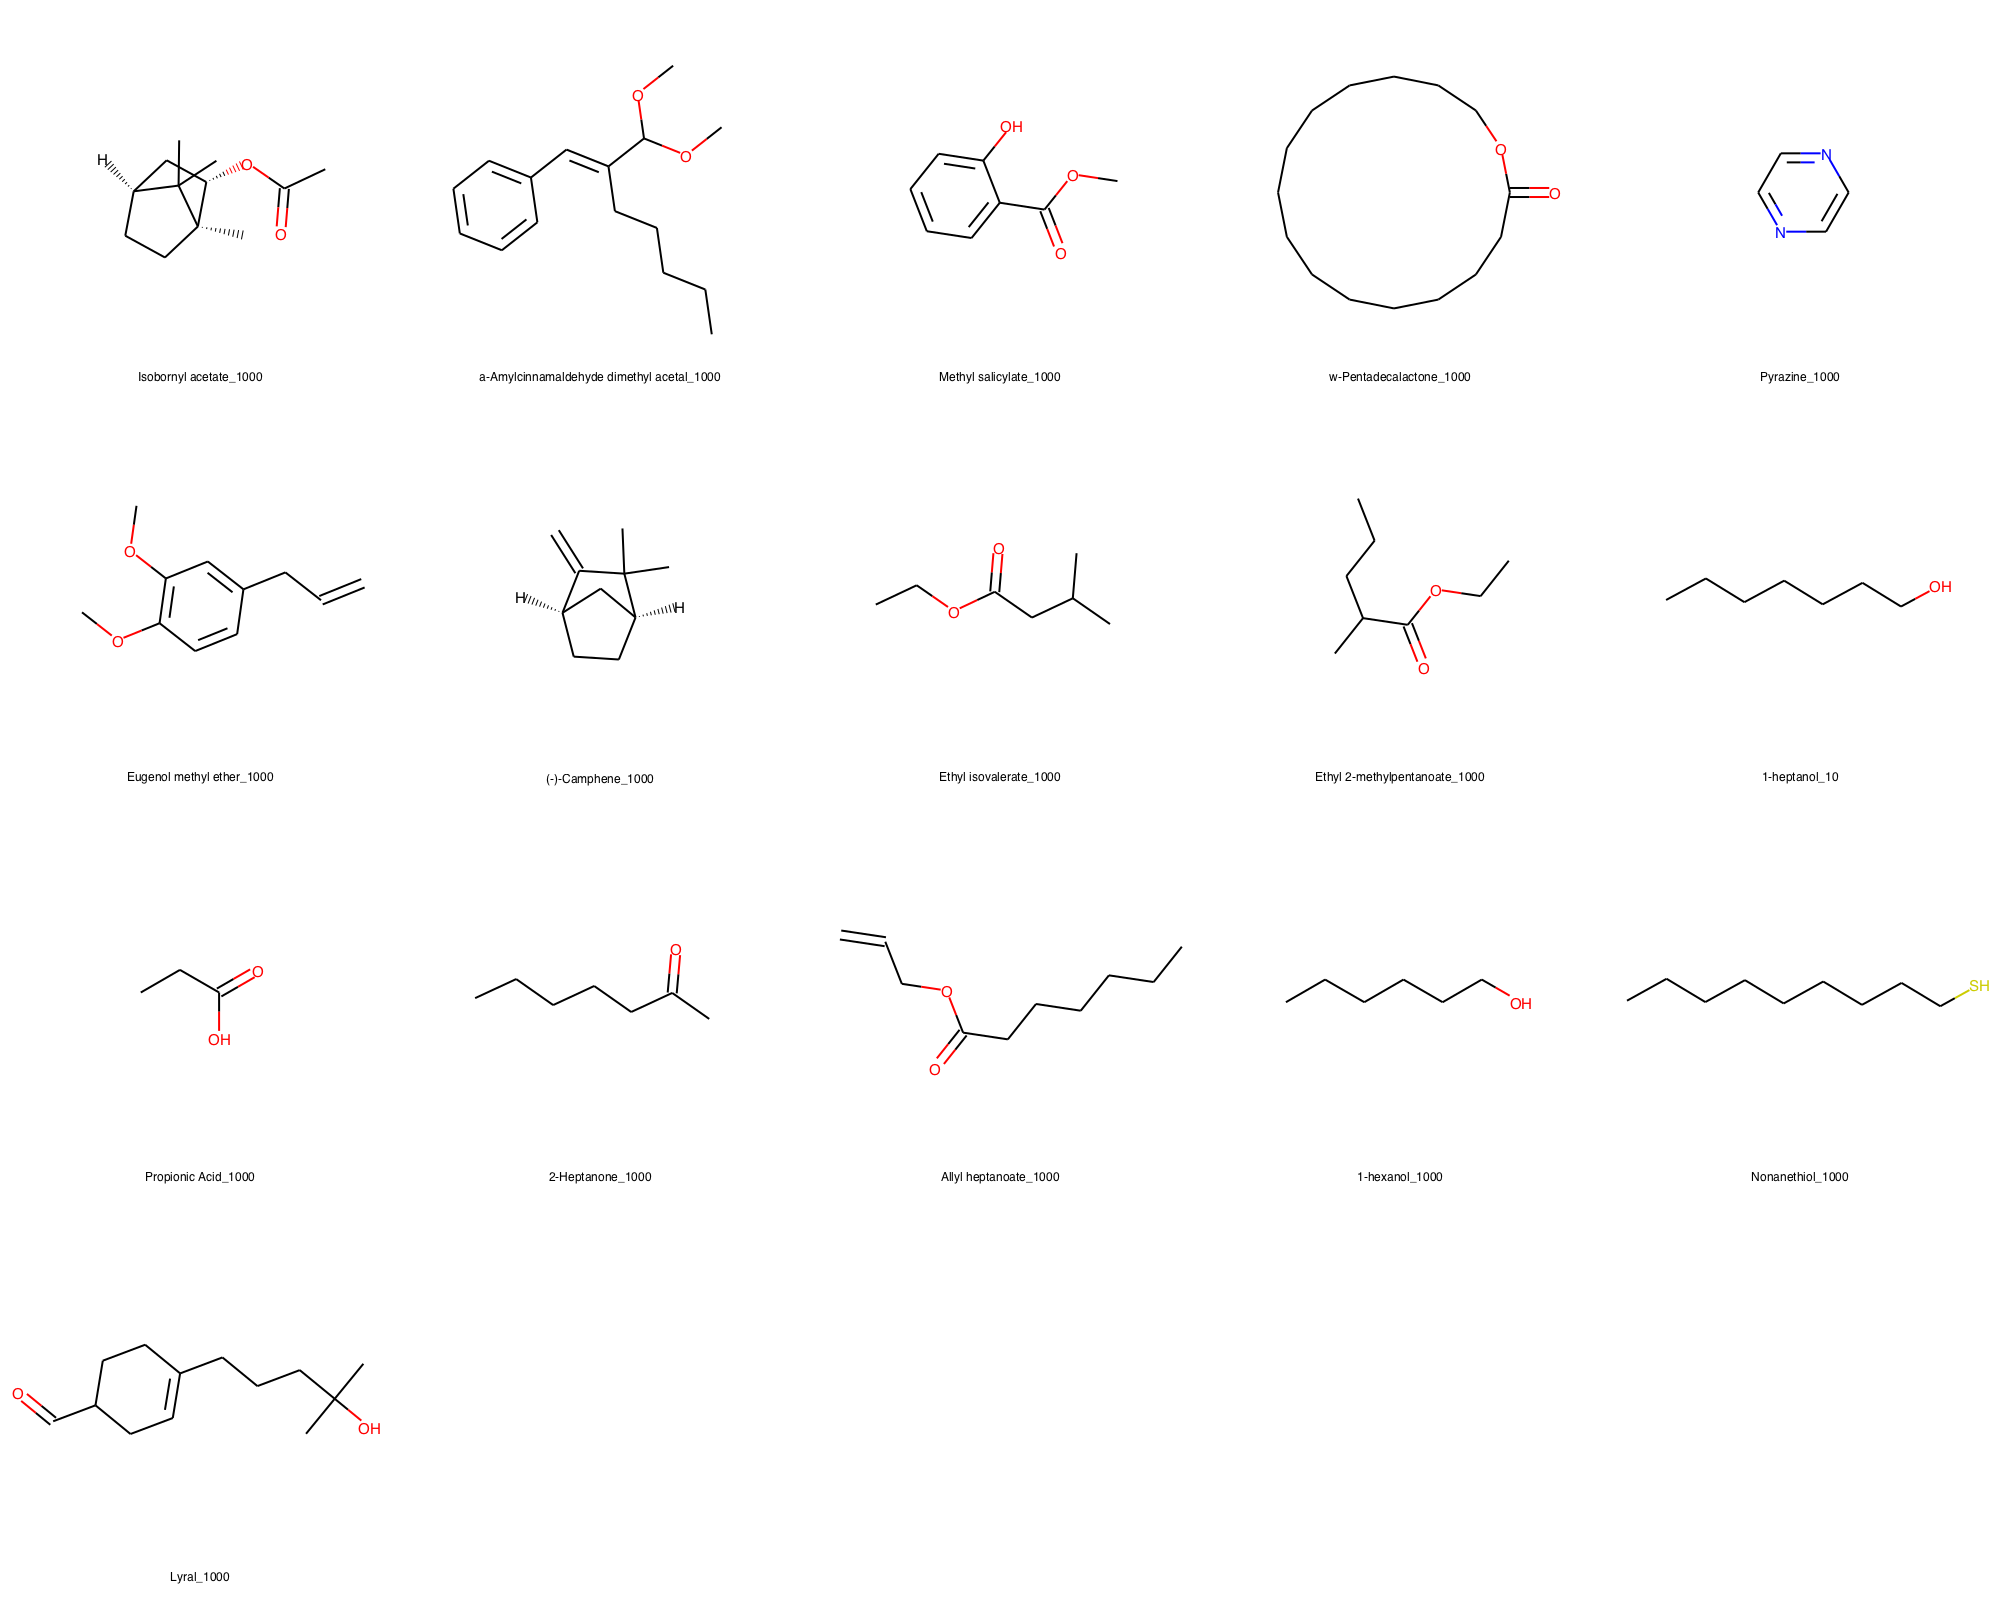

165_1


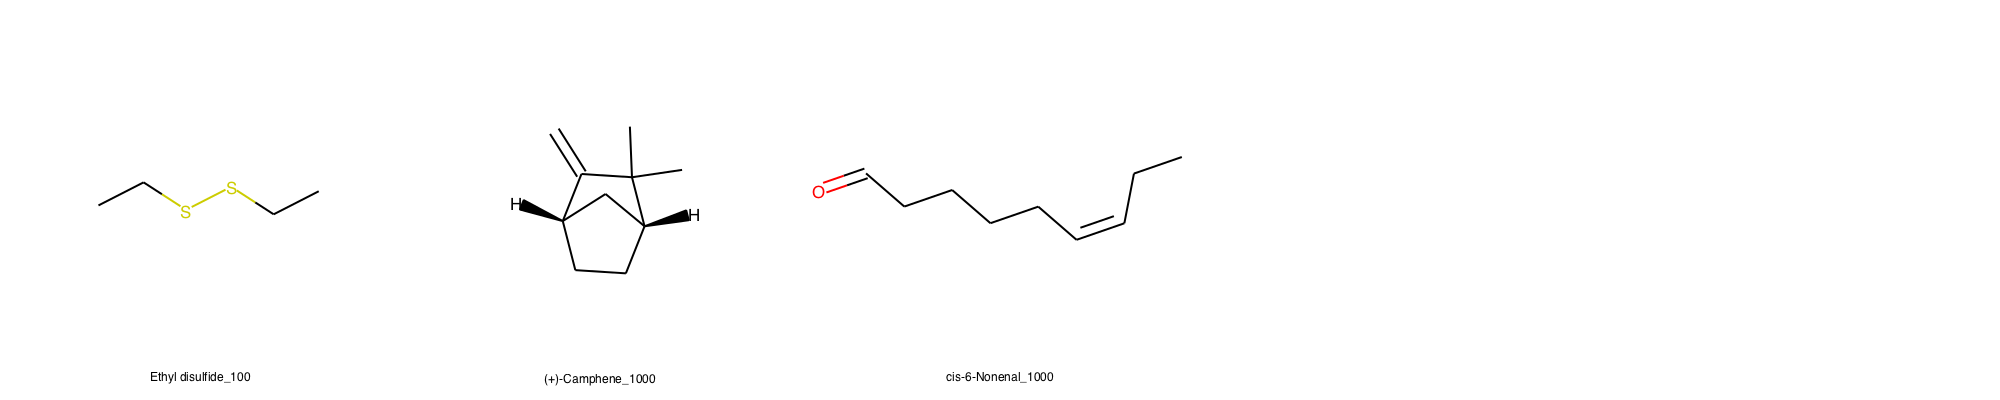

13_1


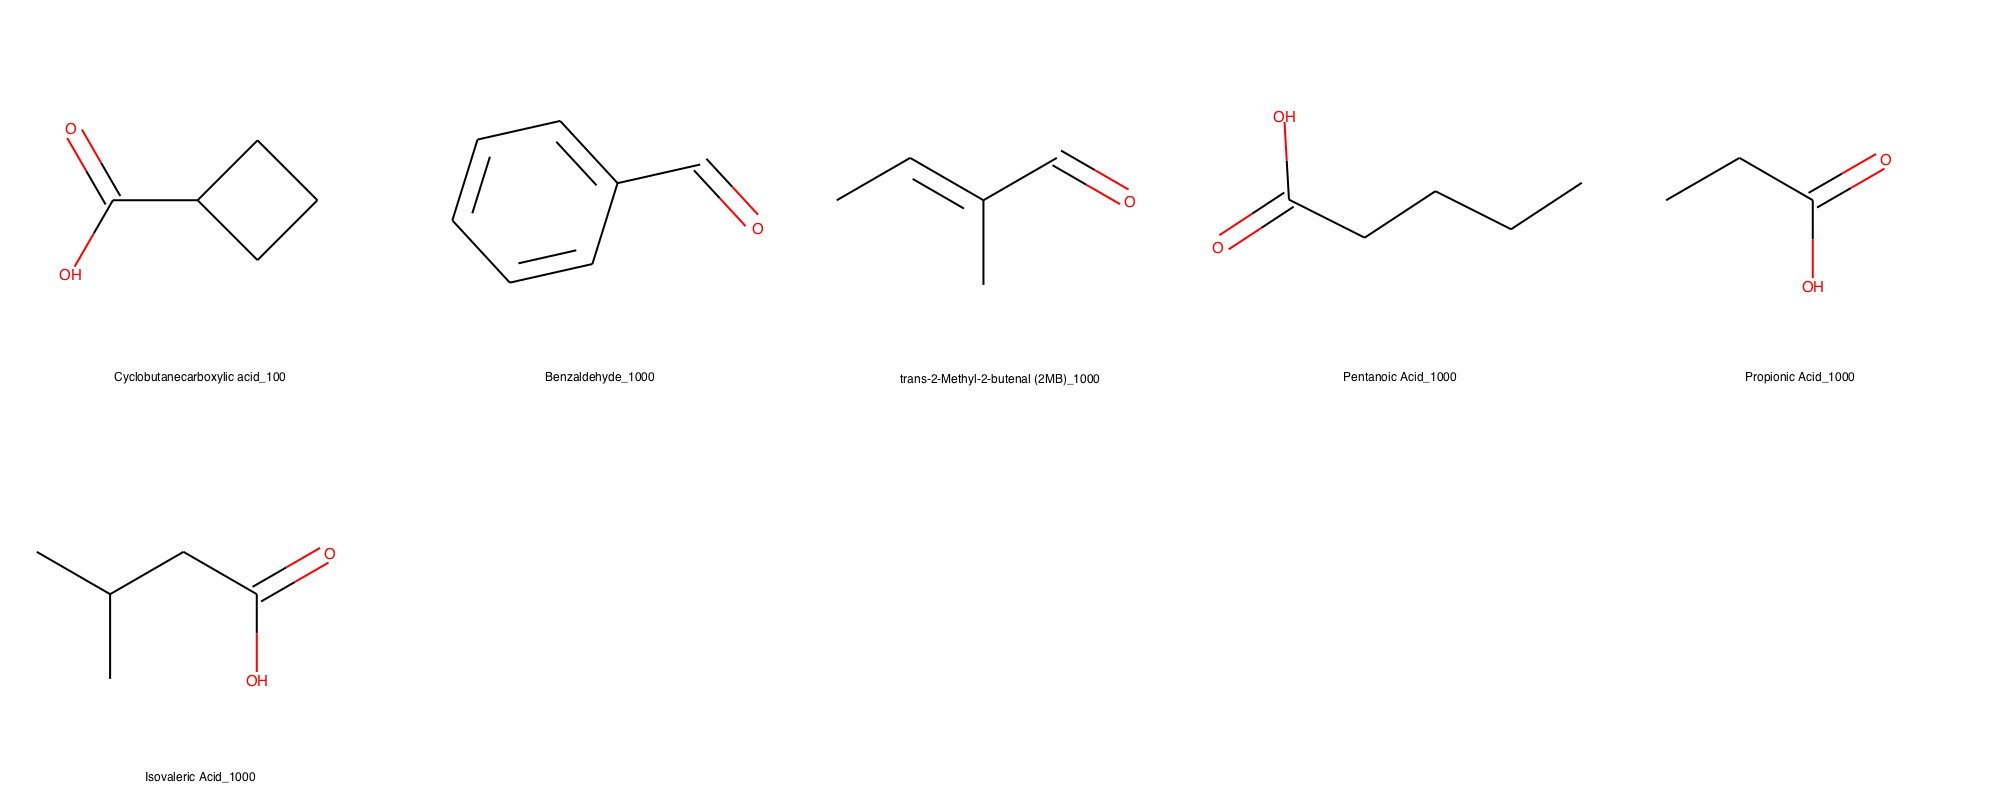

180_1


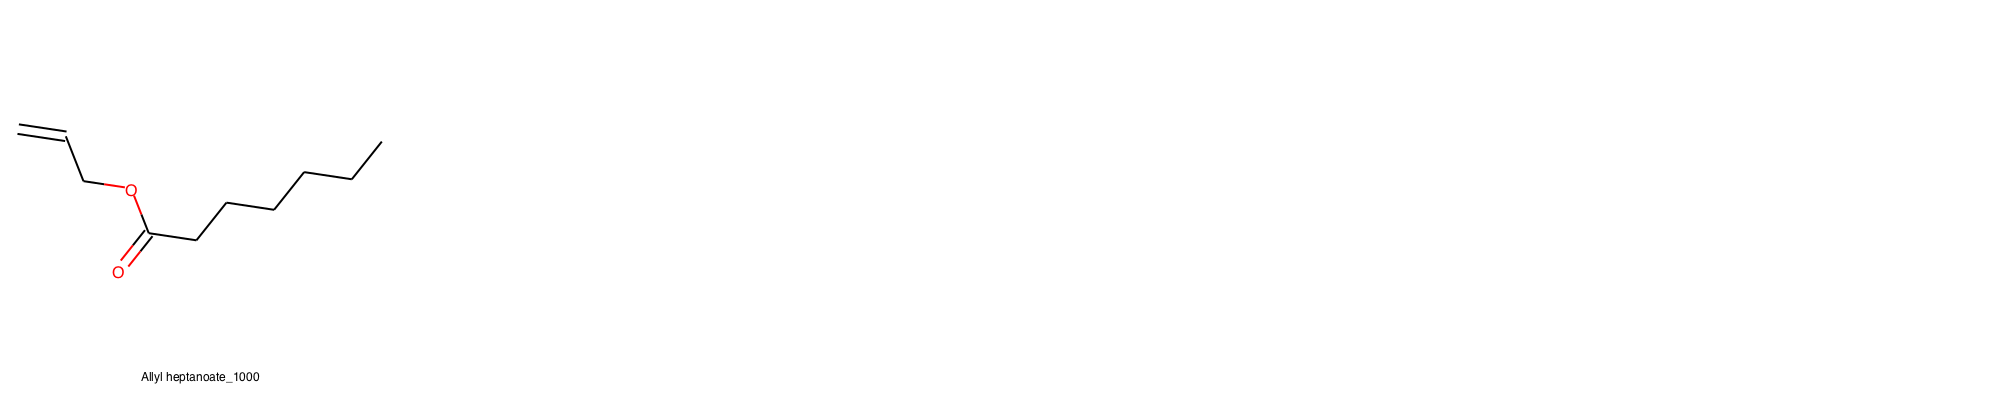

189_1


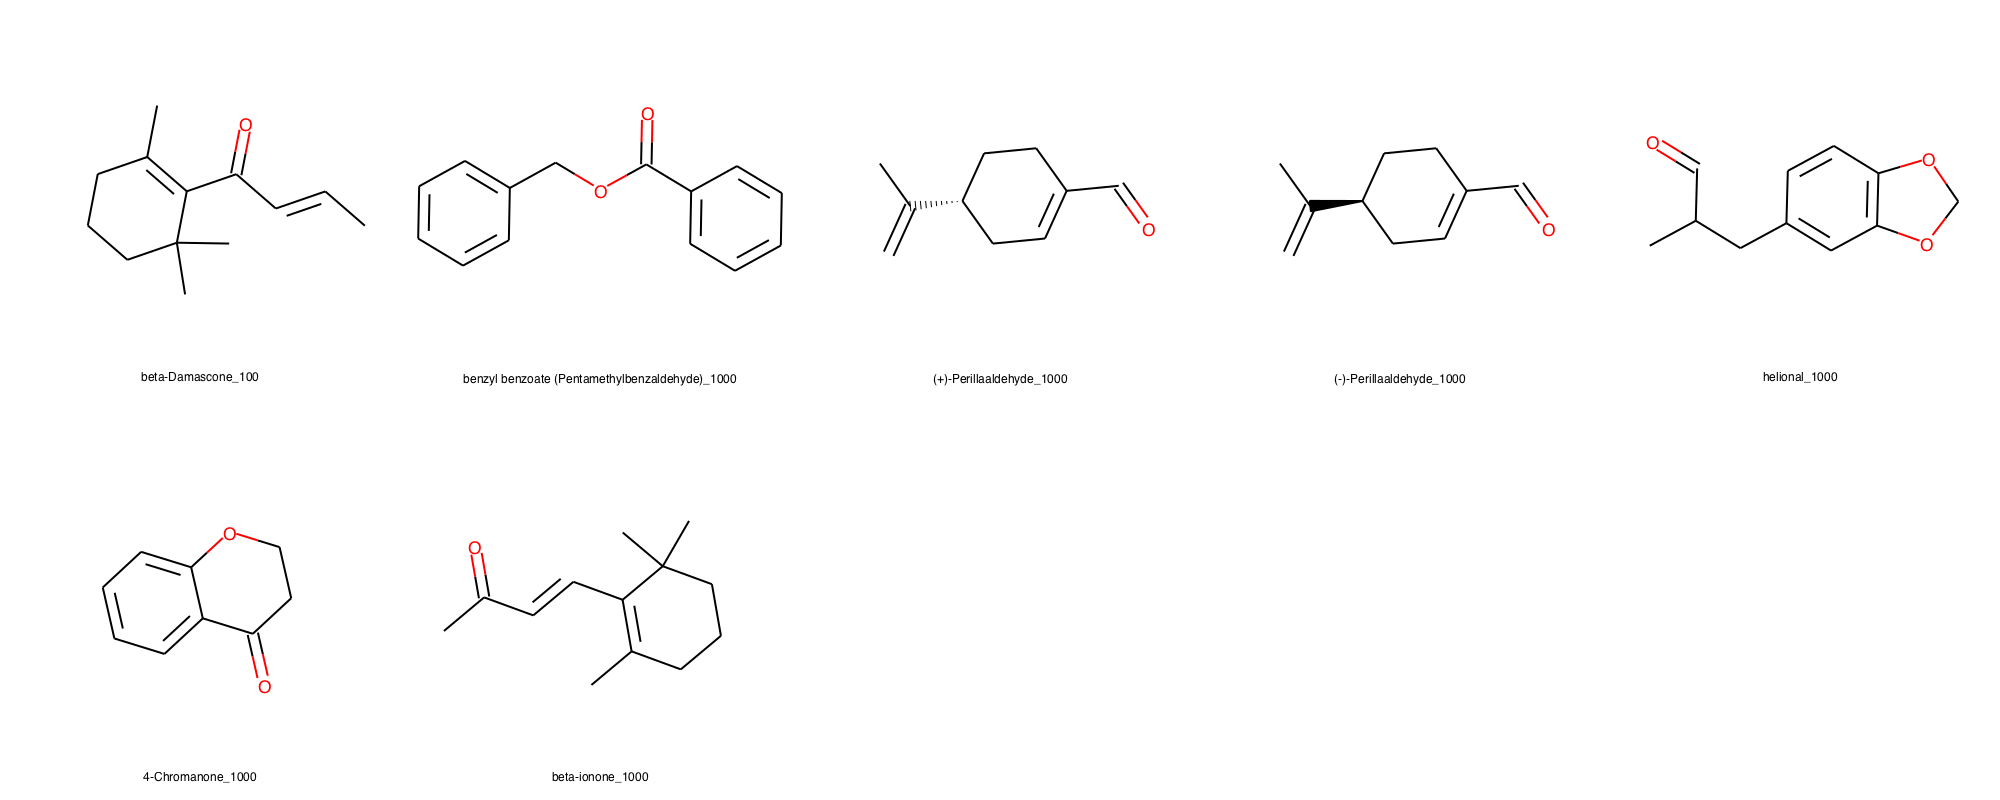

62


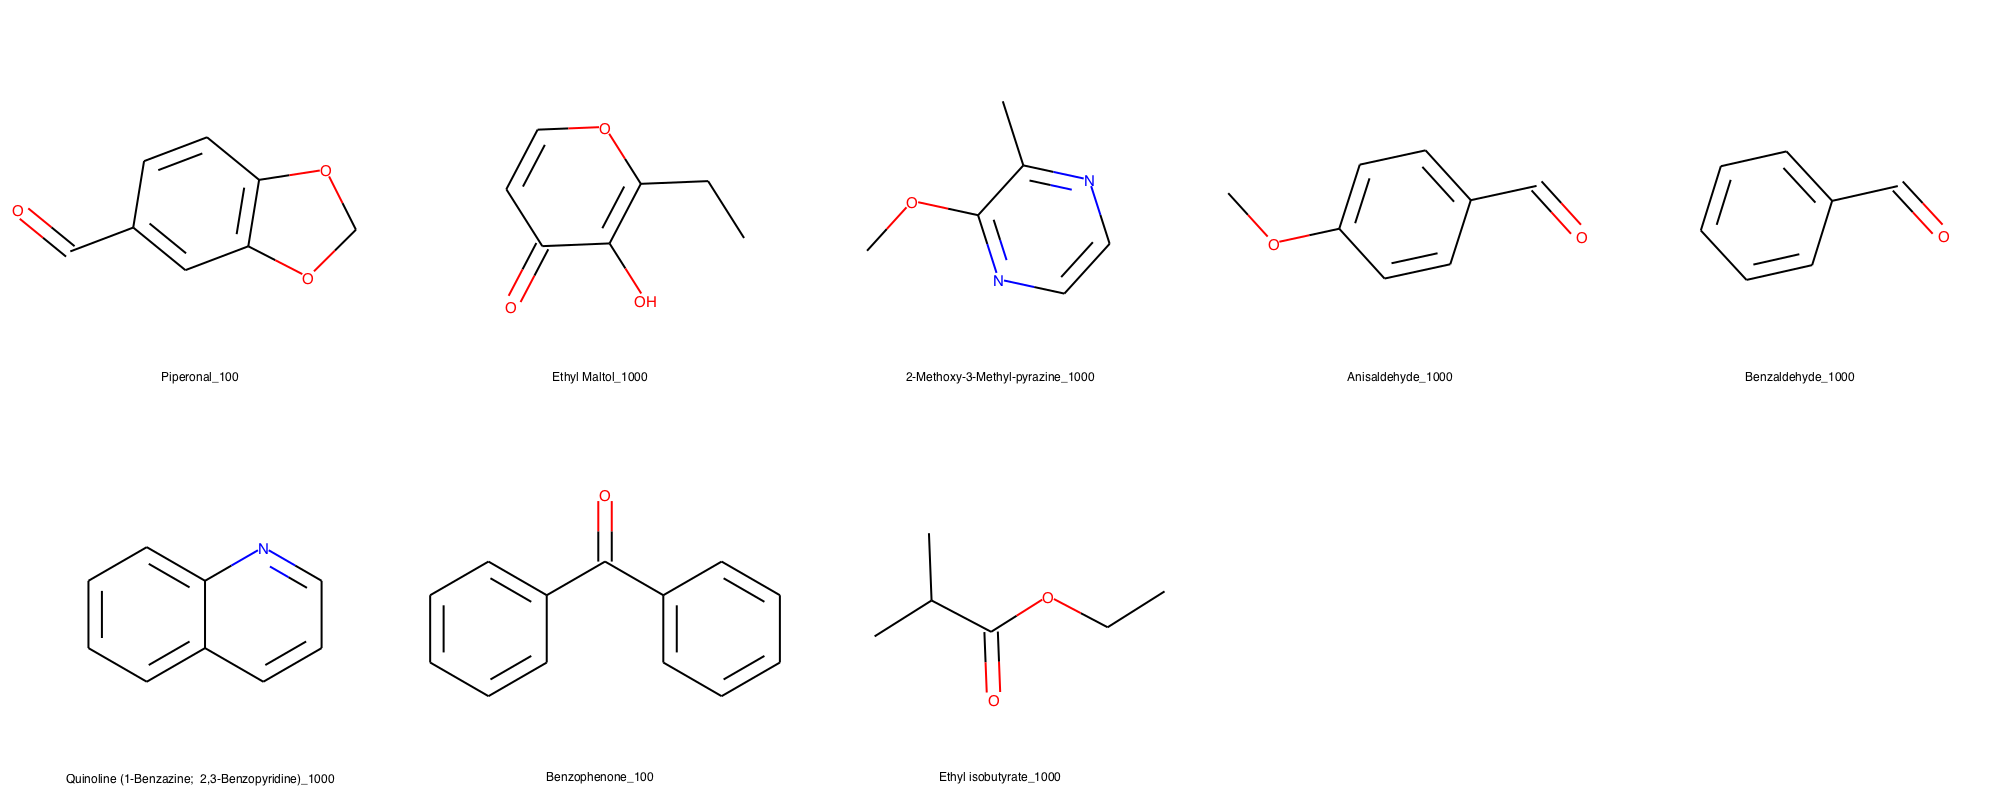

8_1


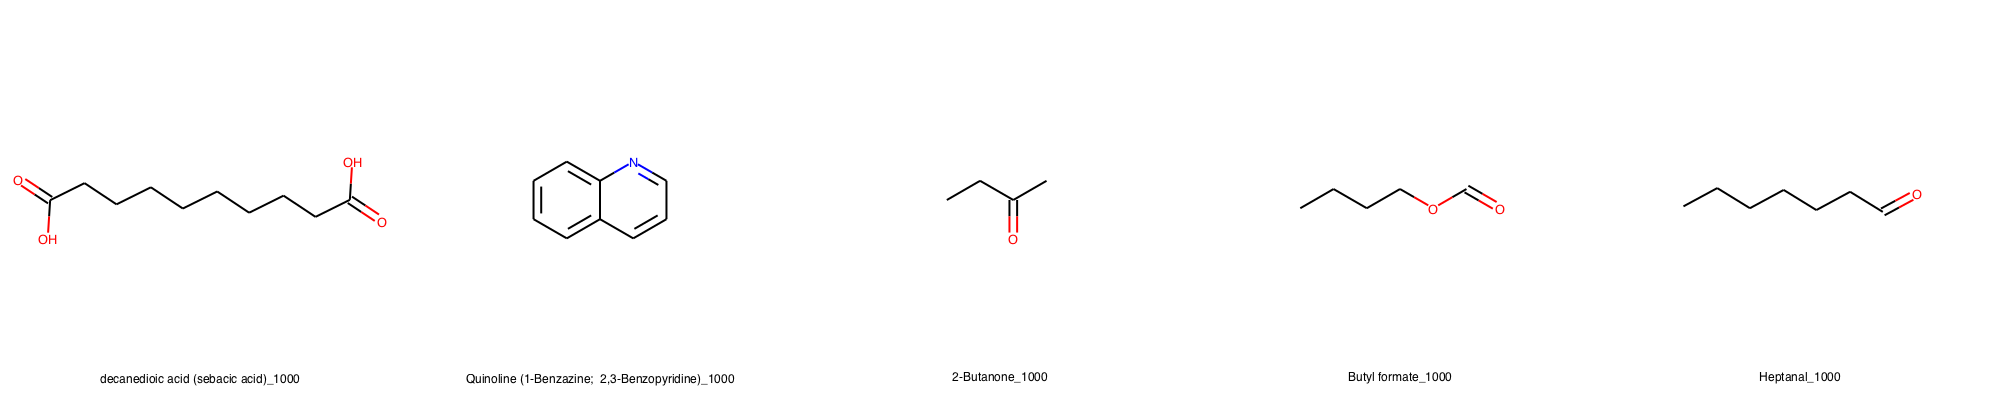

203_1


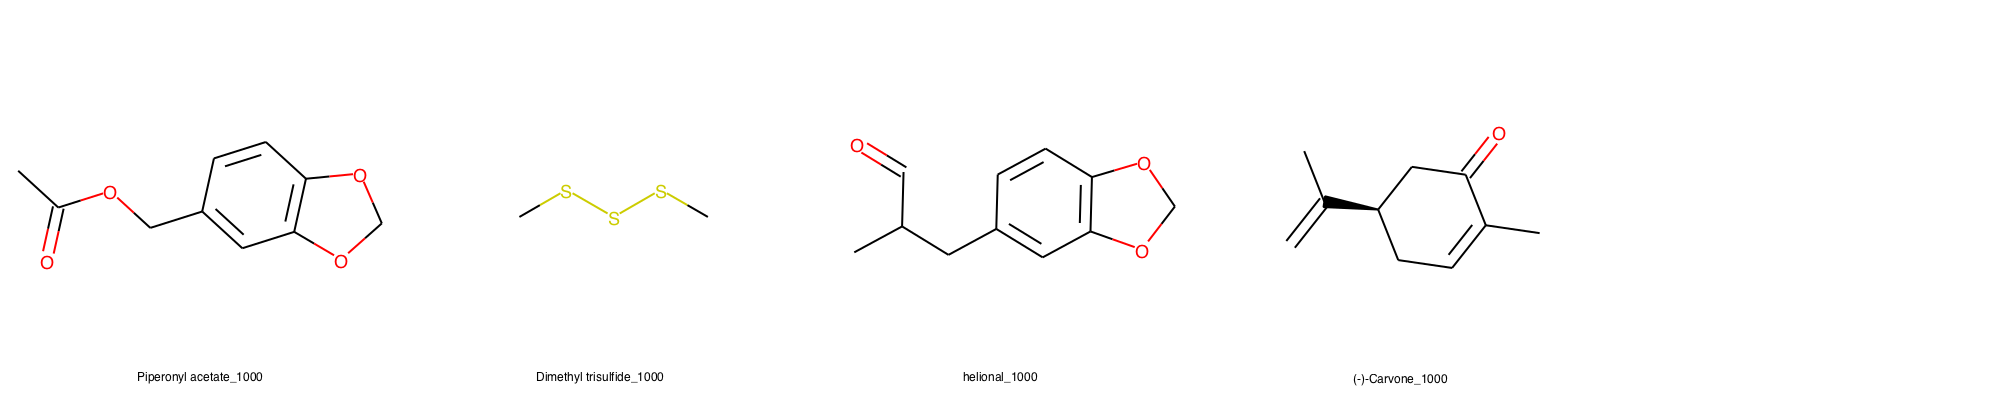

136_1


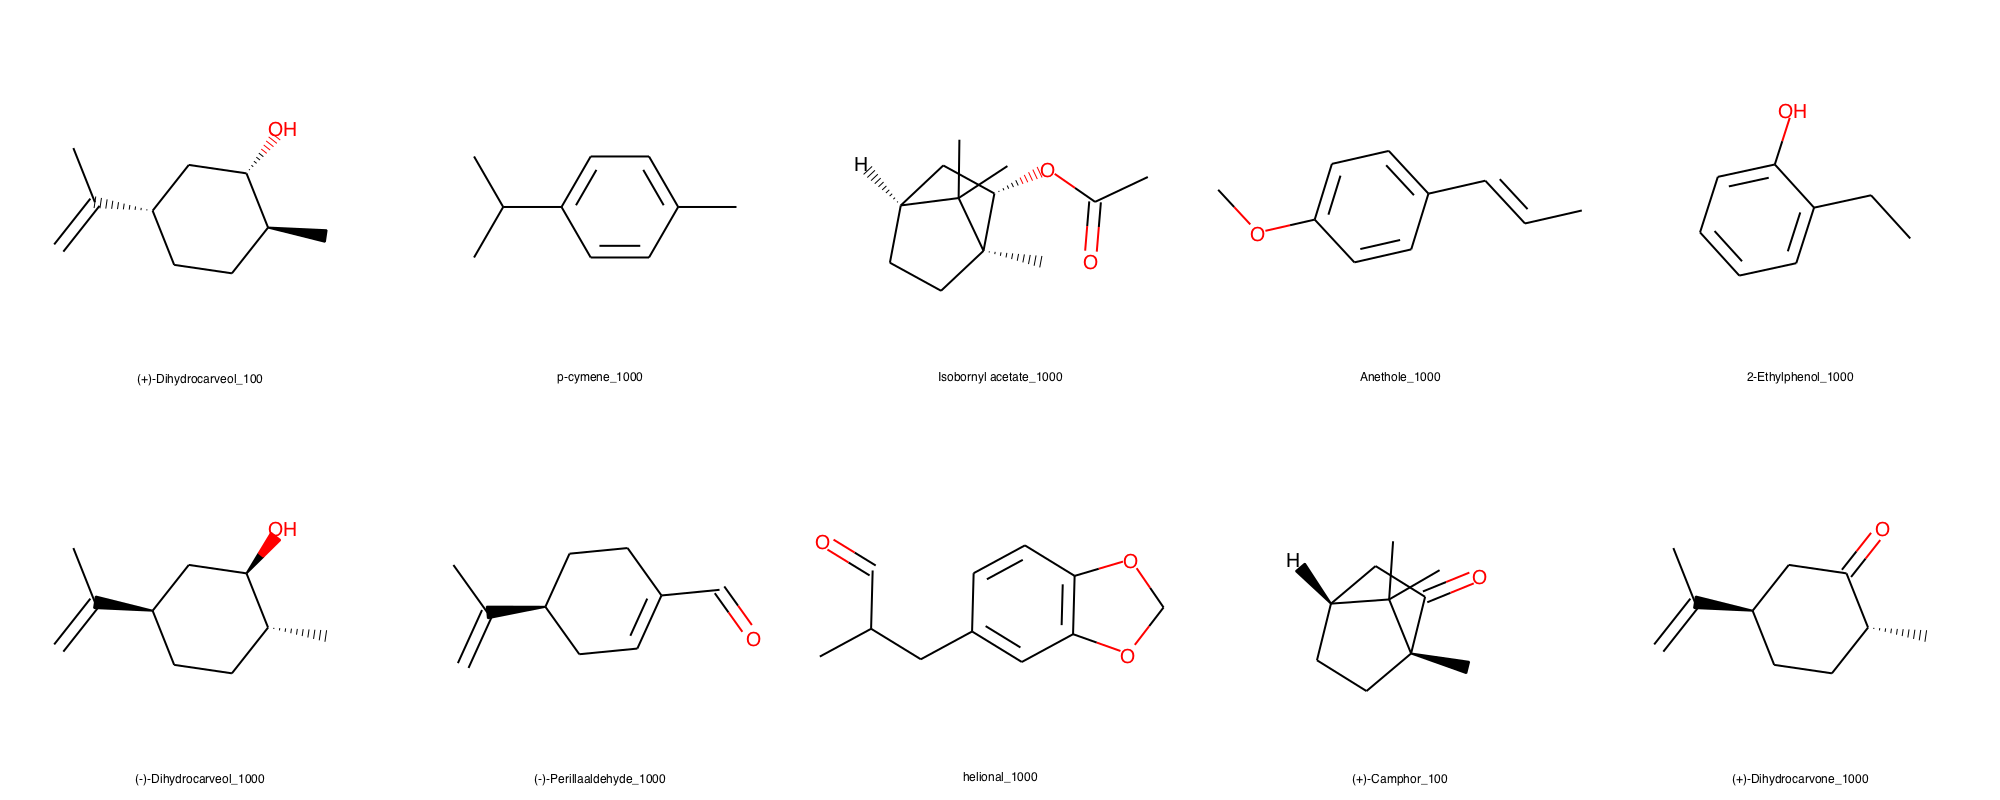

199_1


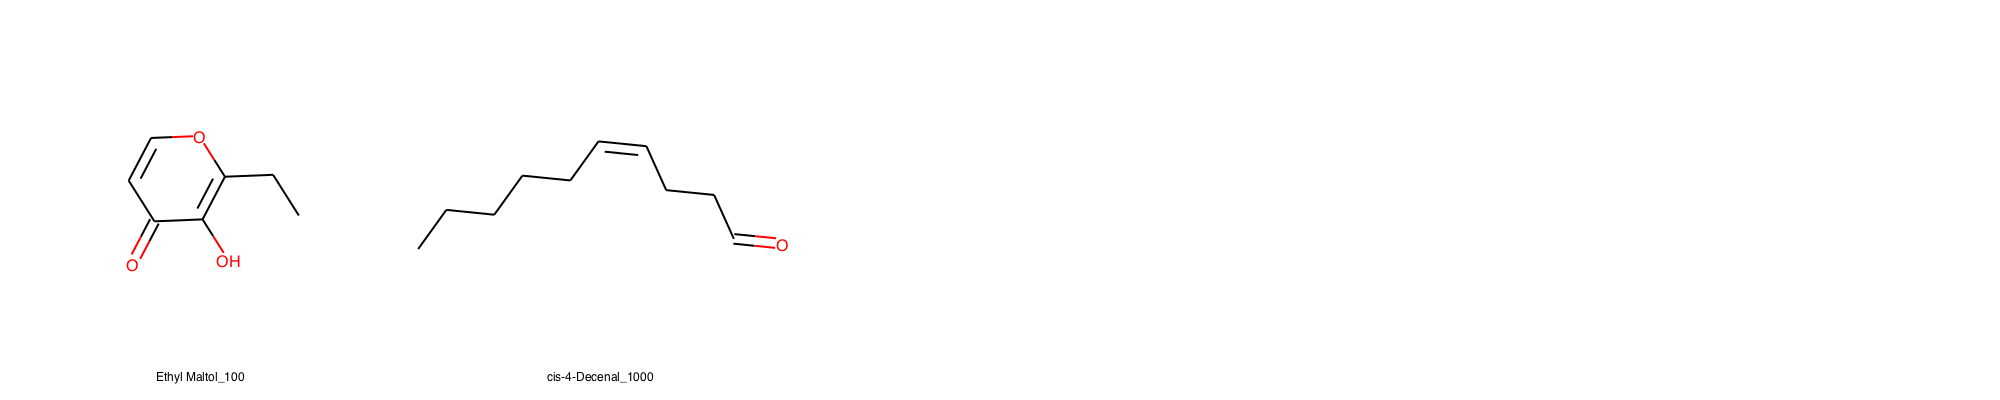

9_1


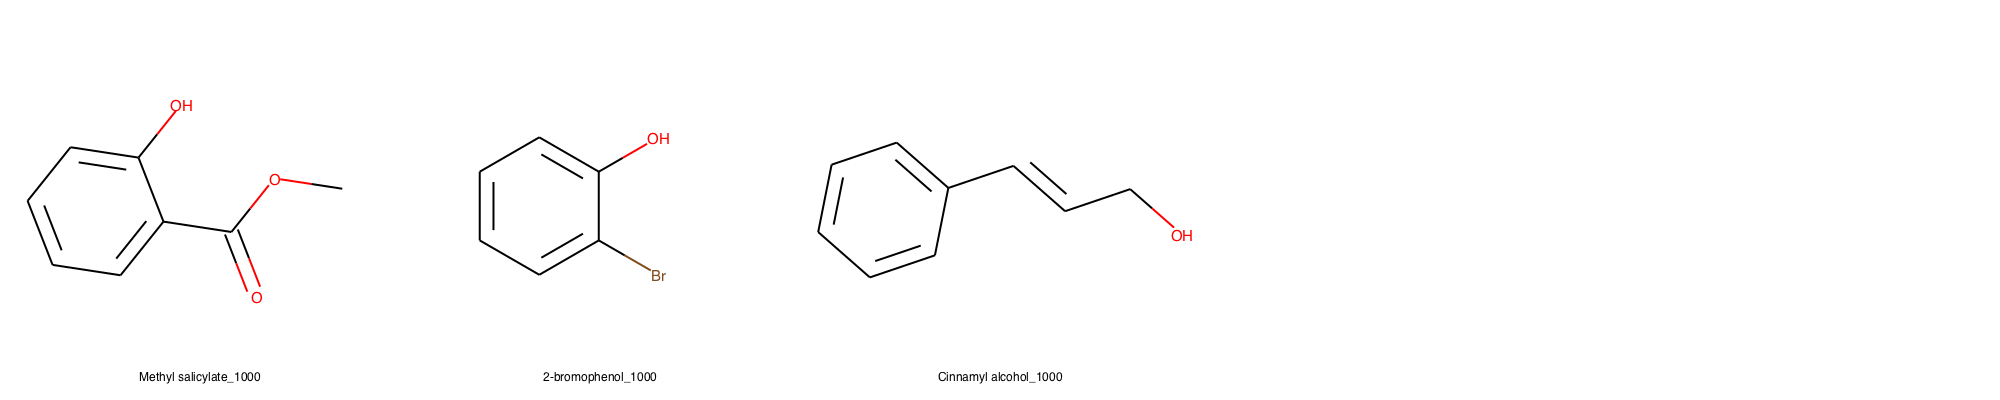

18_1


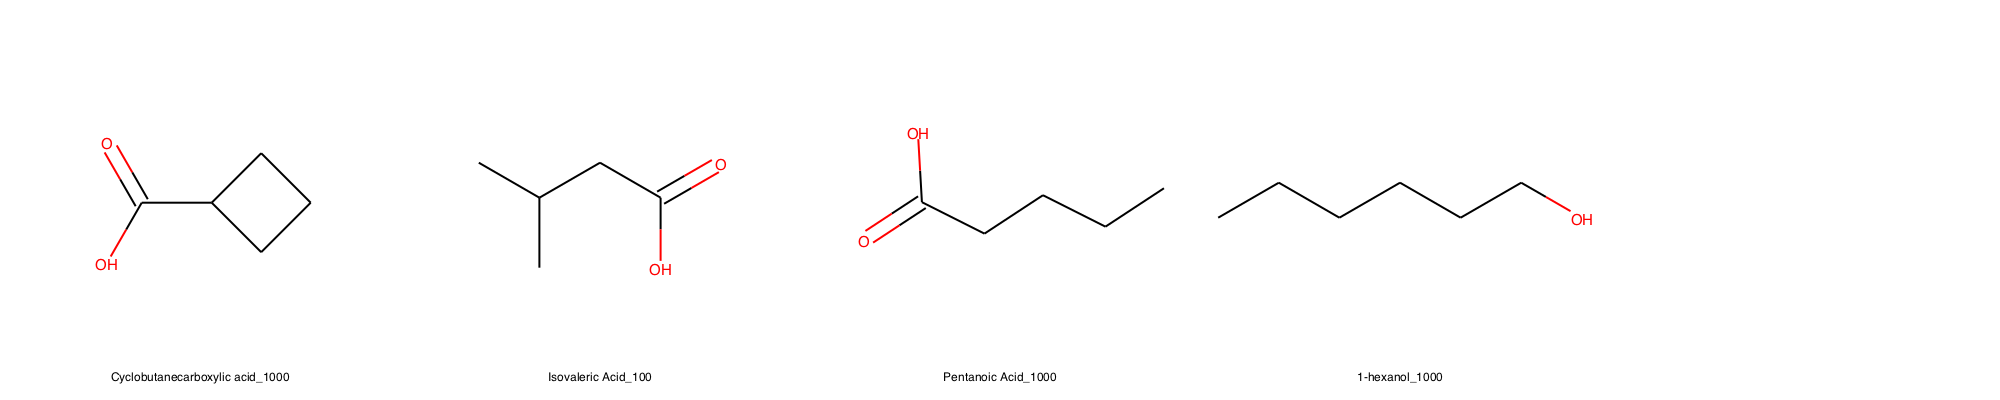

5_1


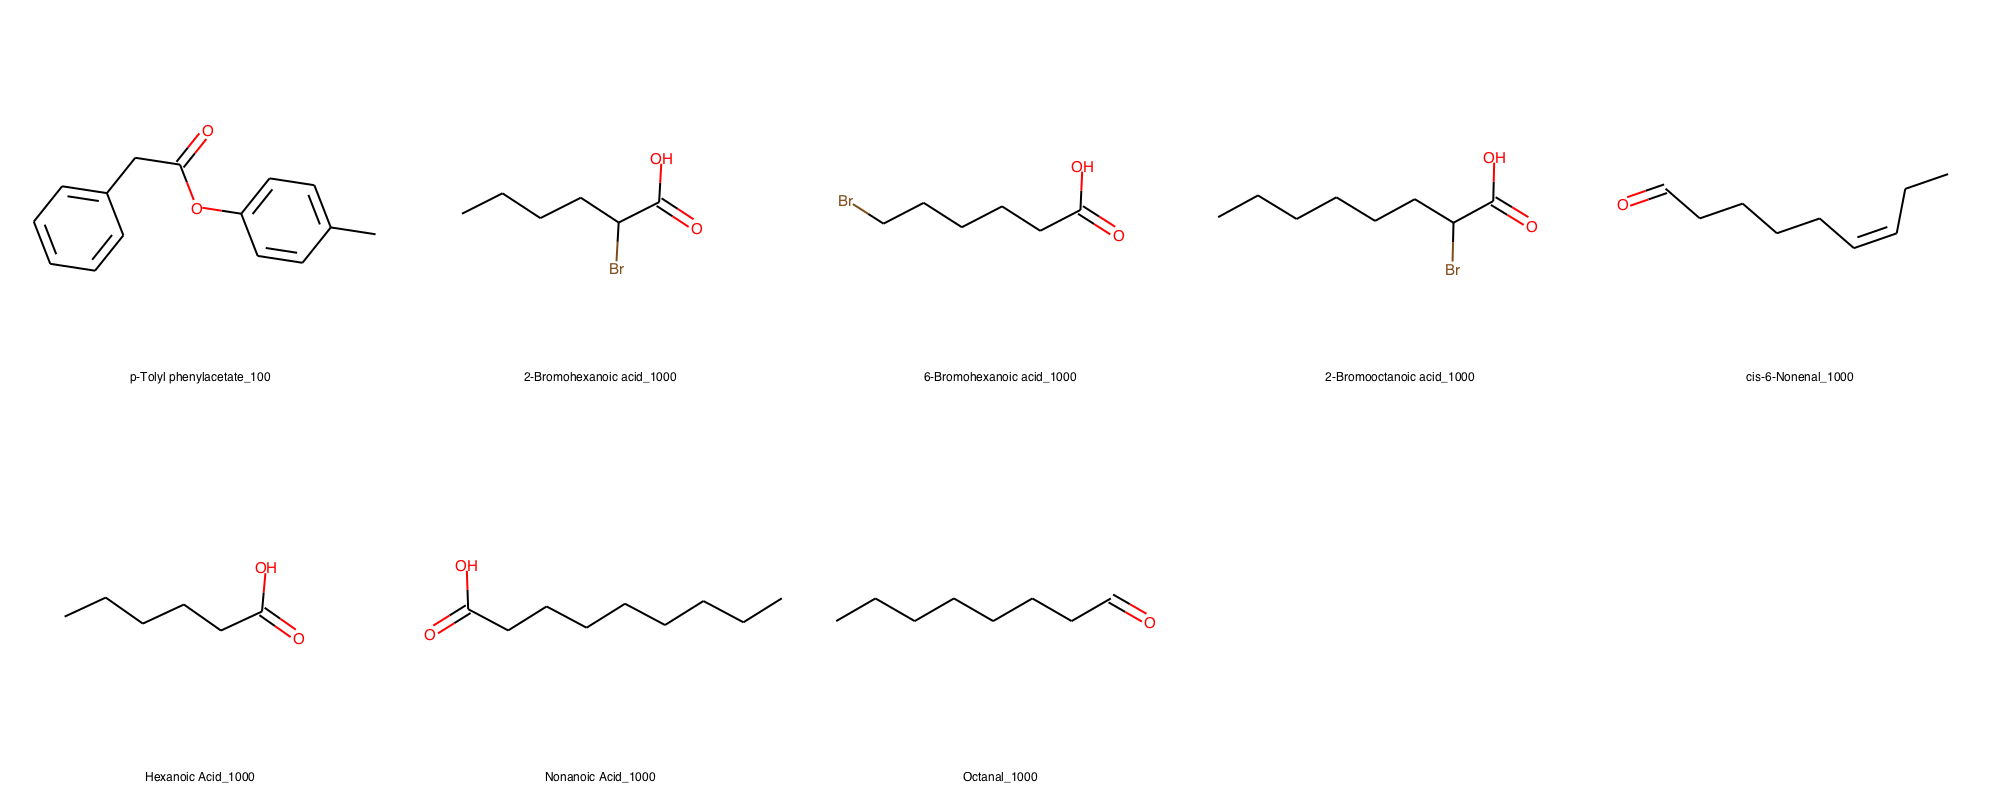

131_1_2


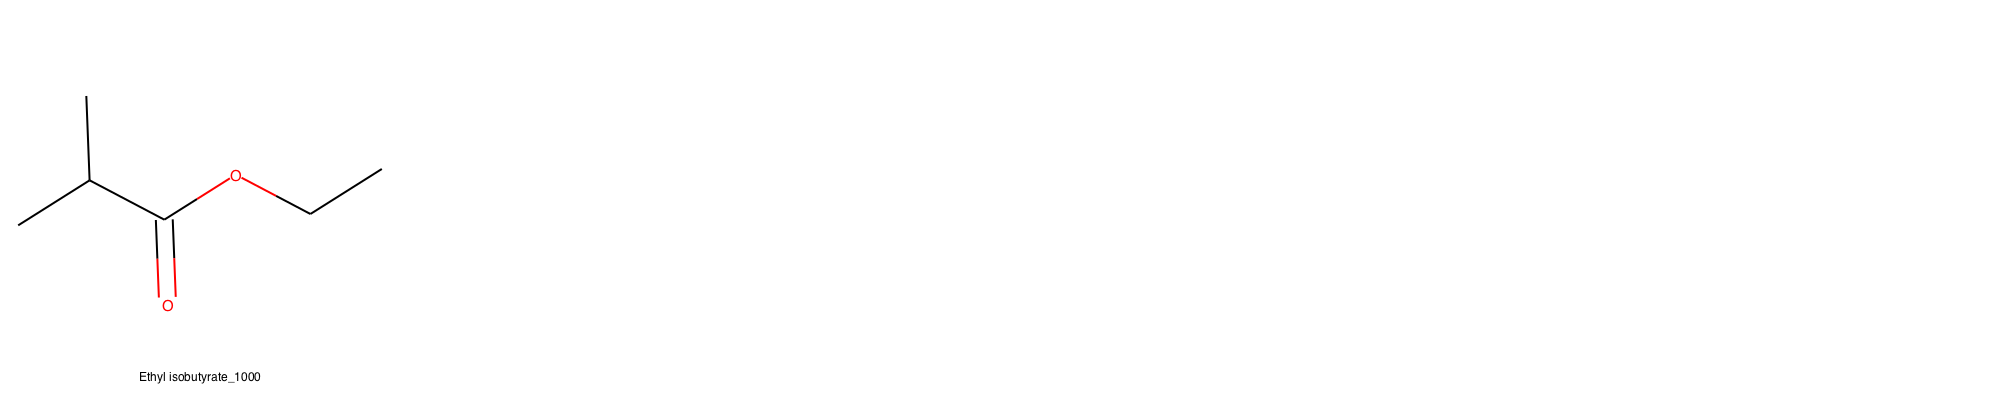

112_1


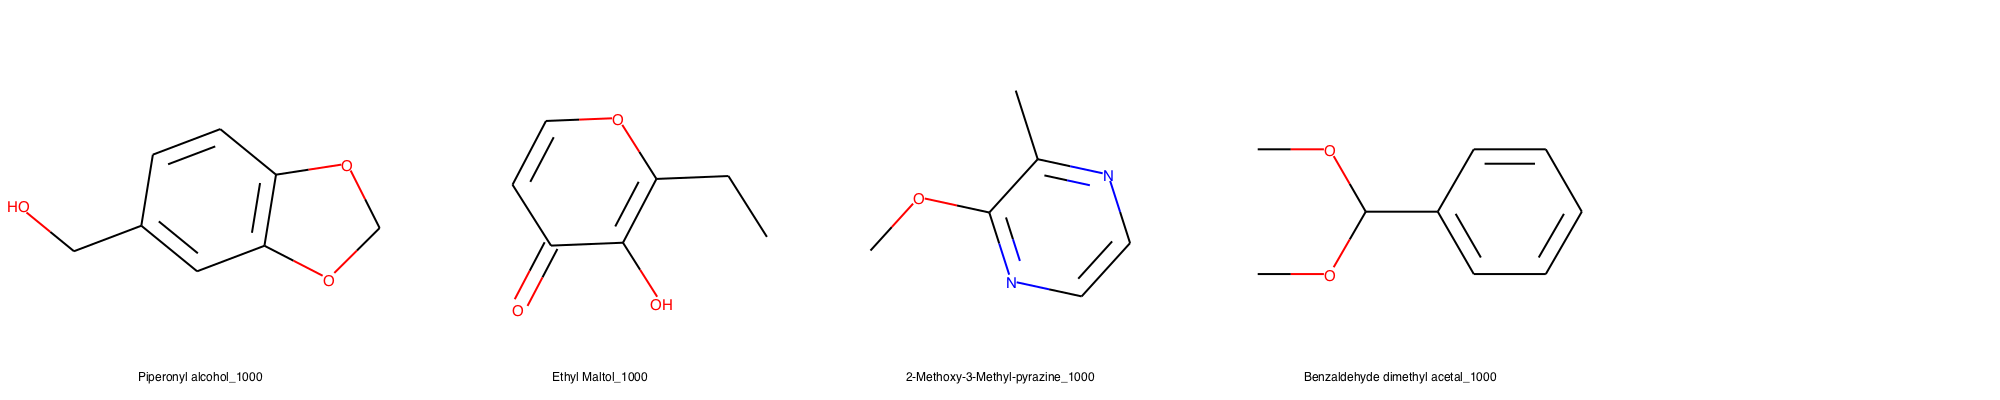

158_1


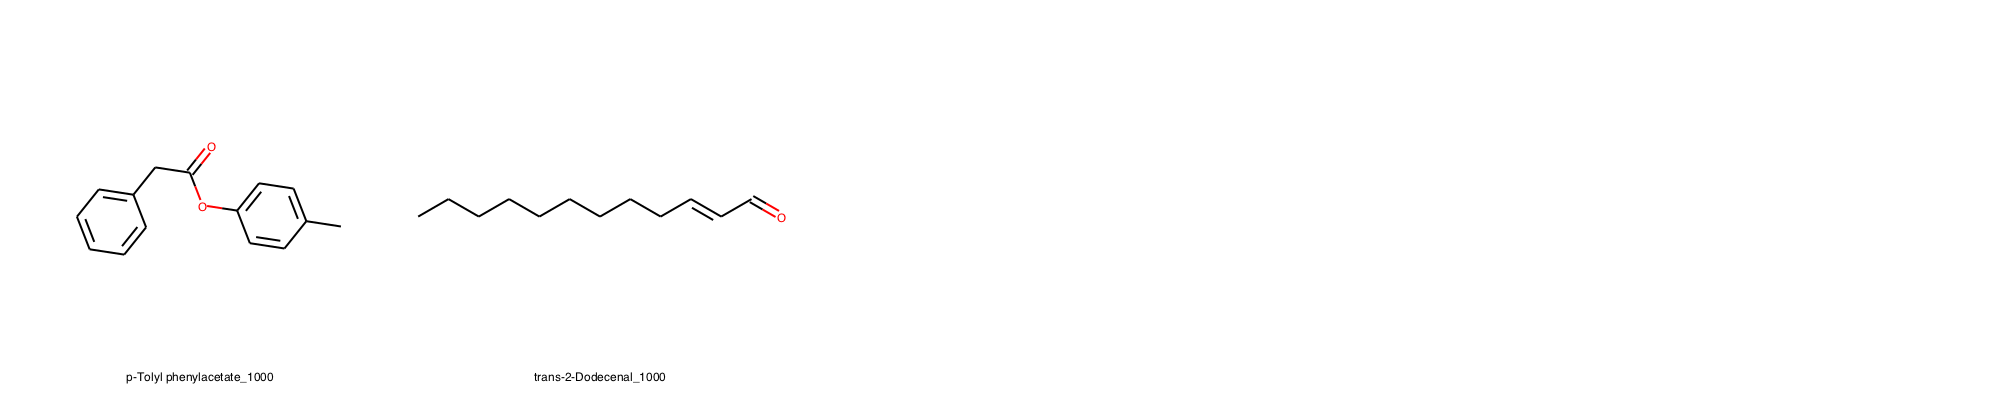

4_1


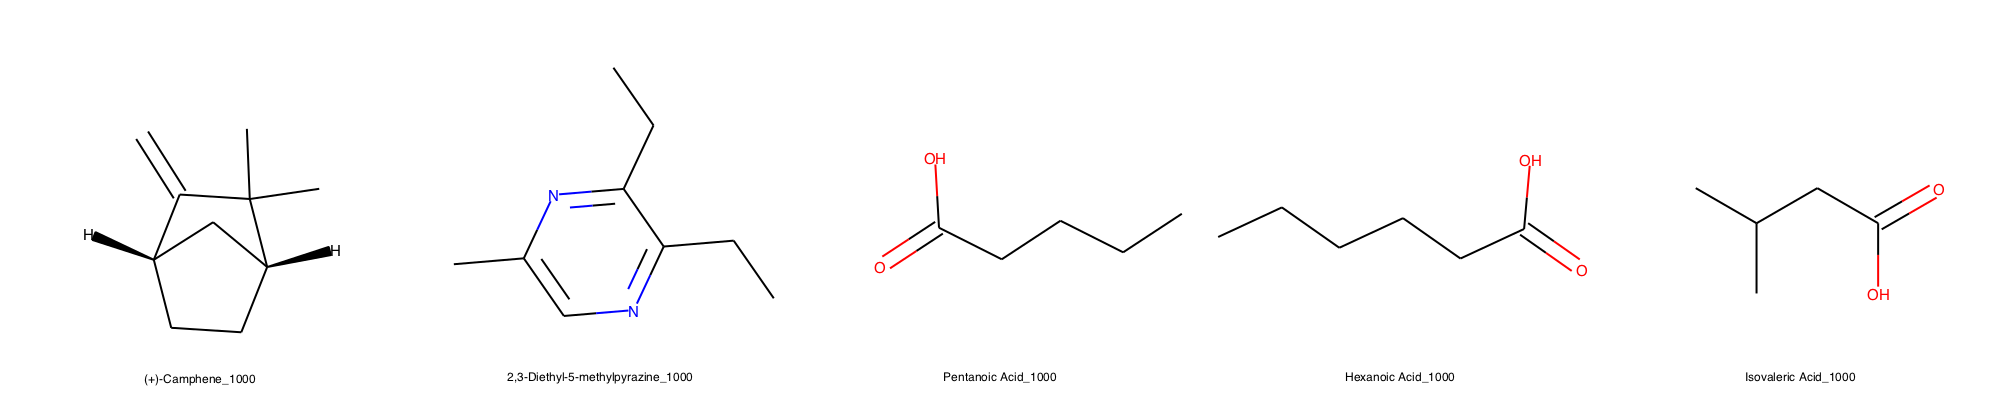

149_1


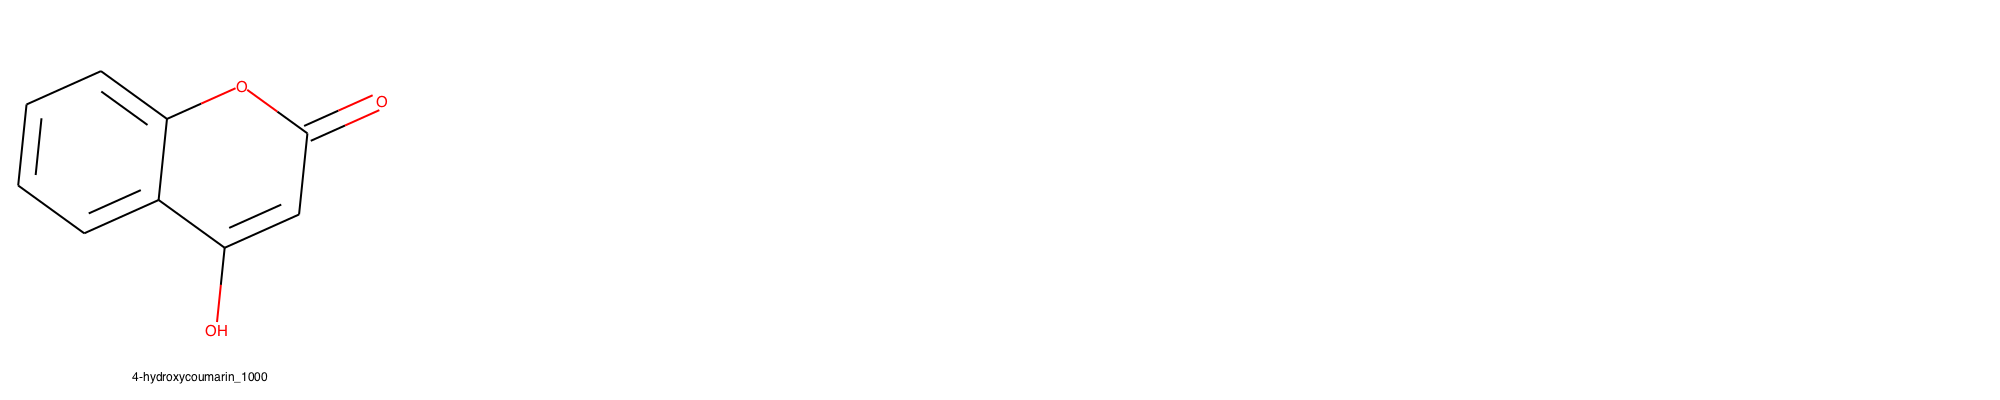

133_1


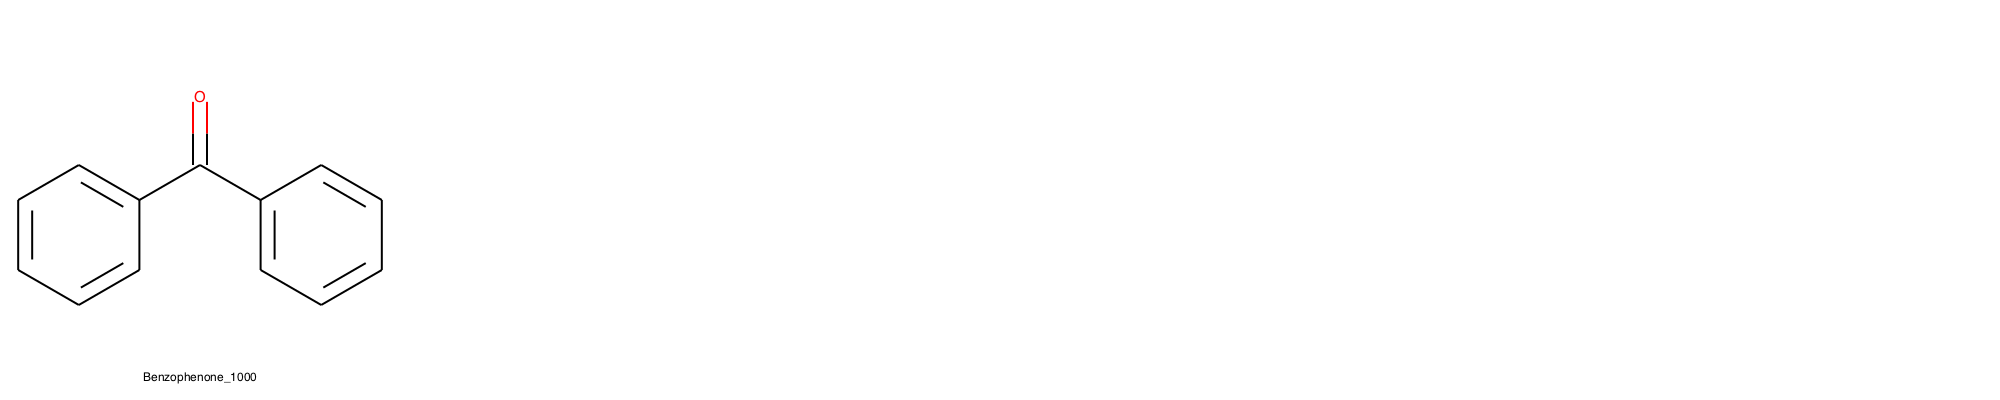

139_1


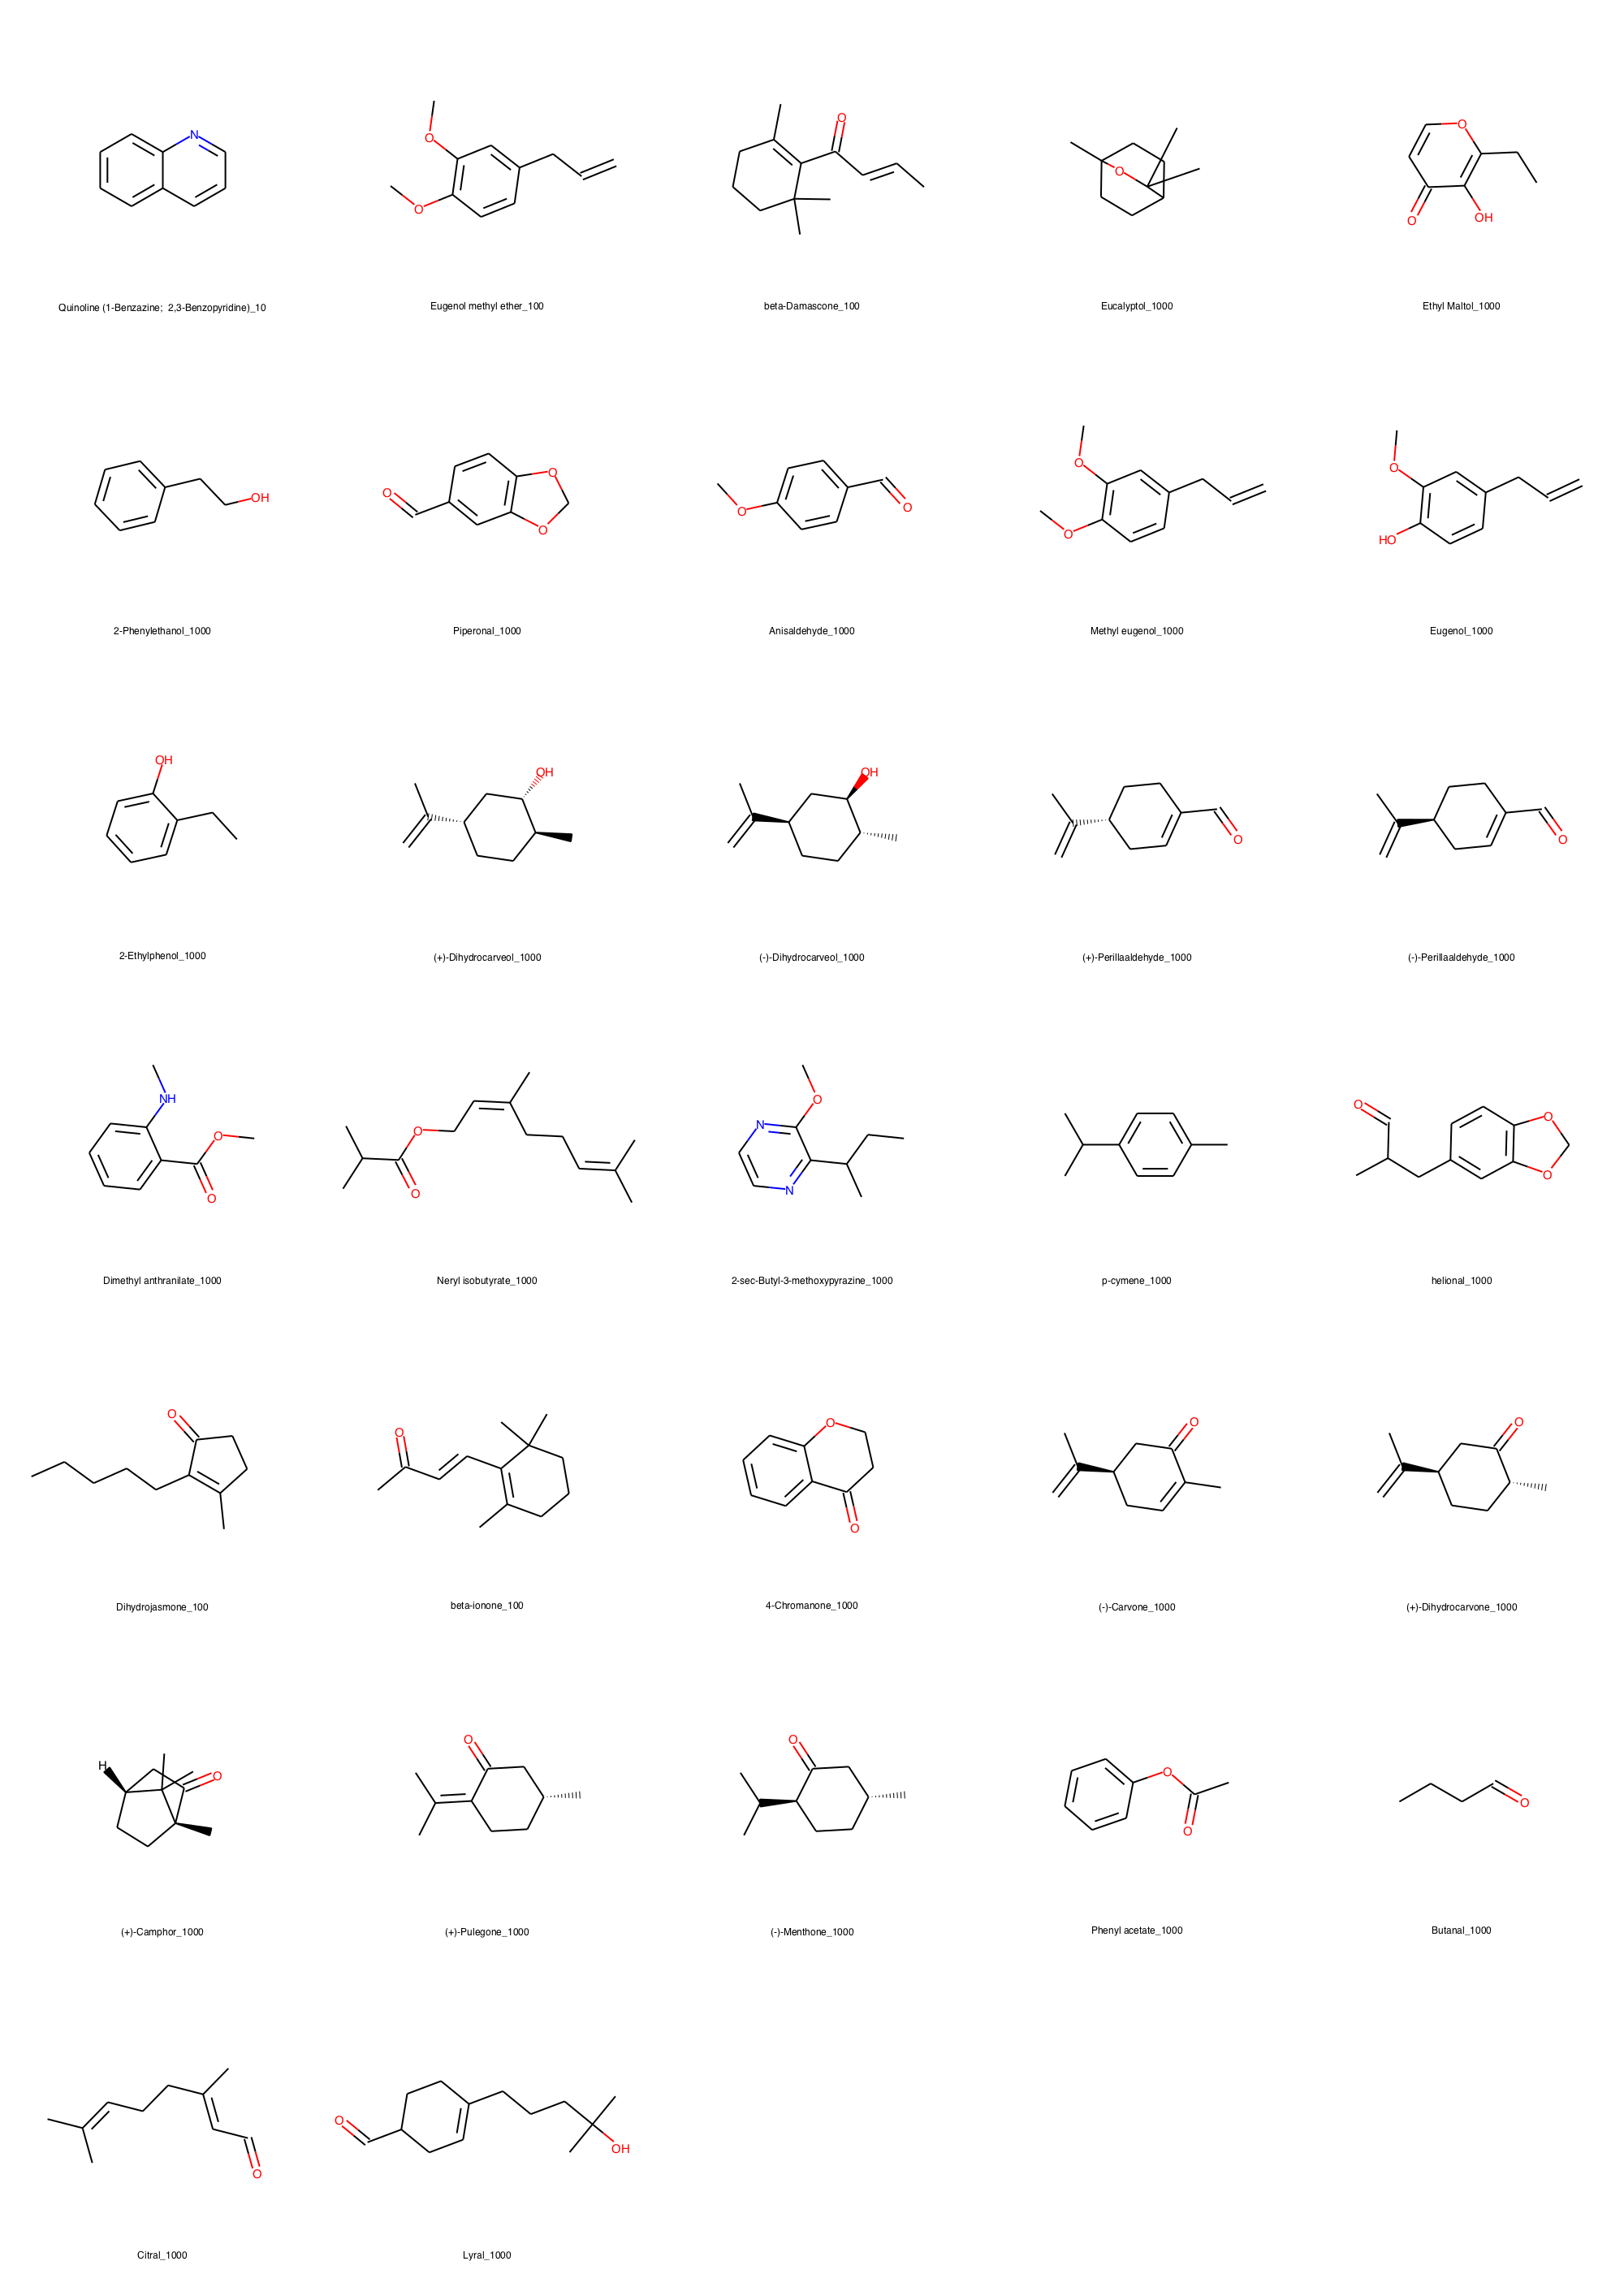

132_1


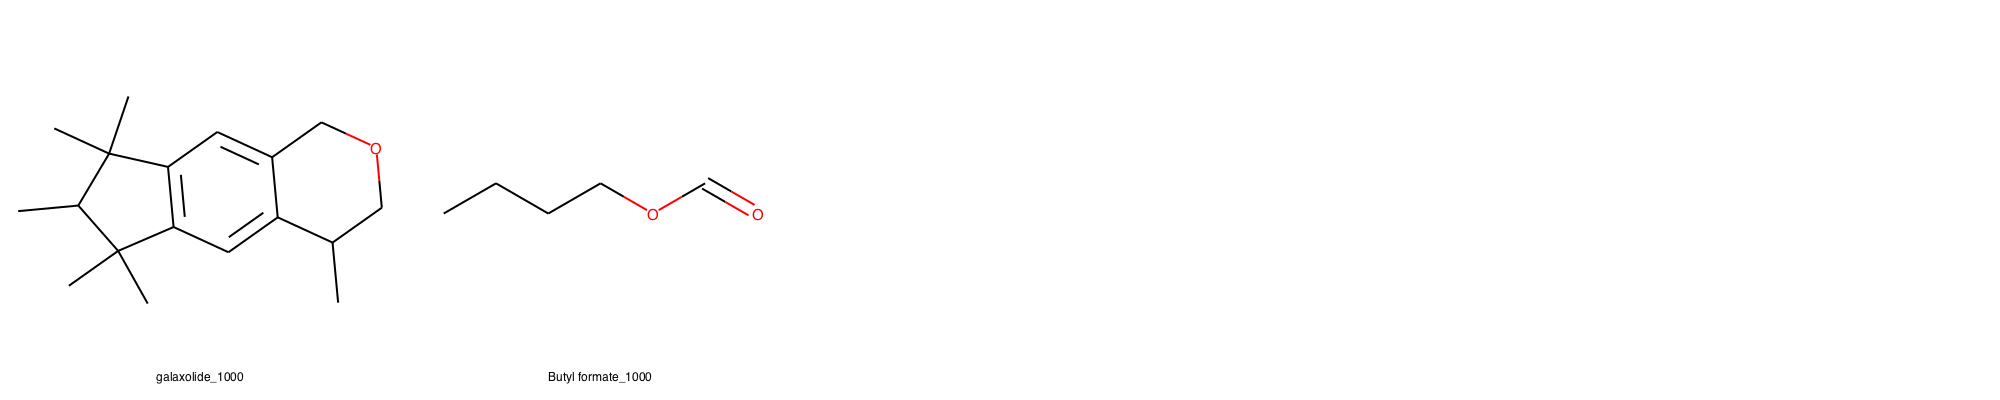

170_1


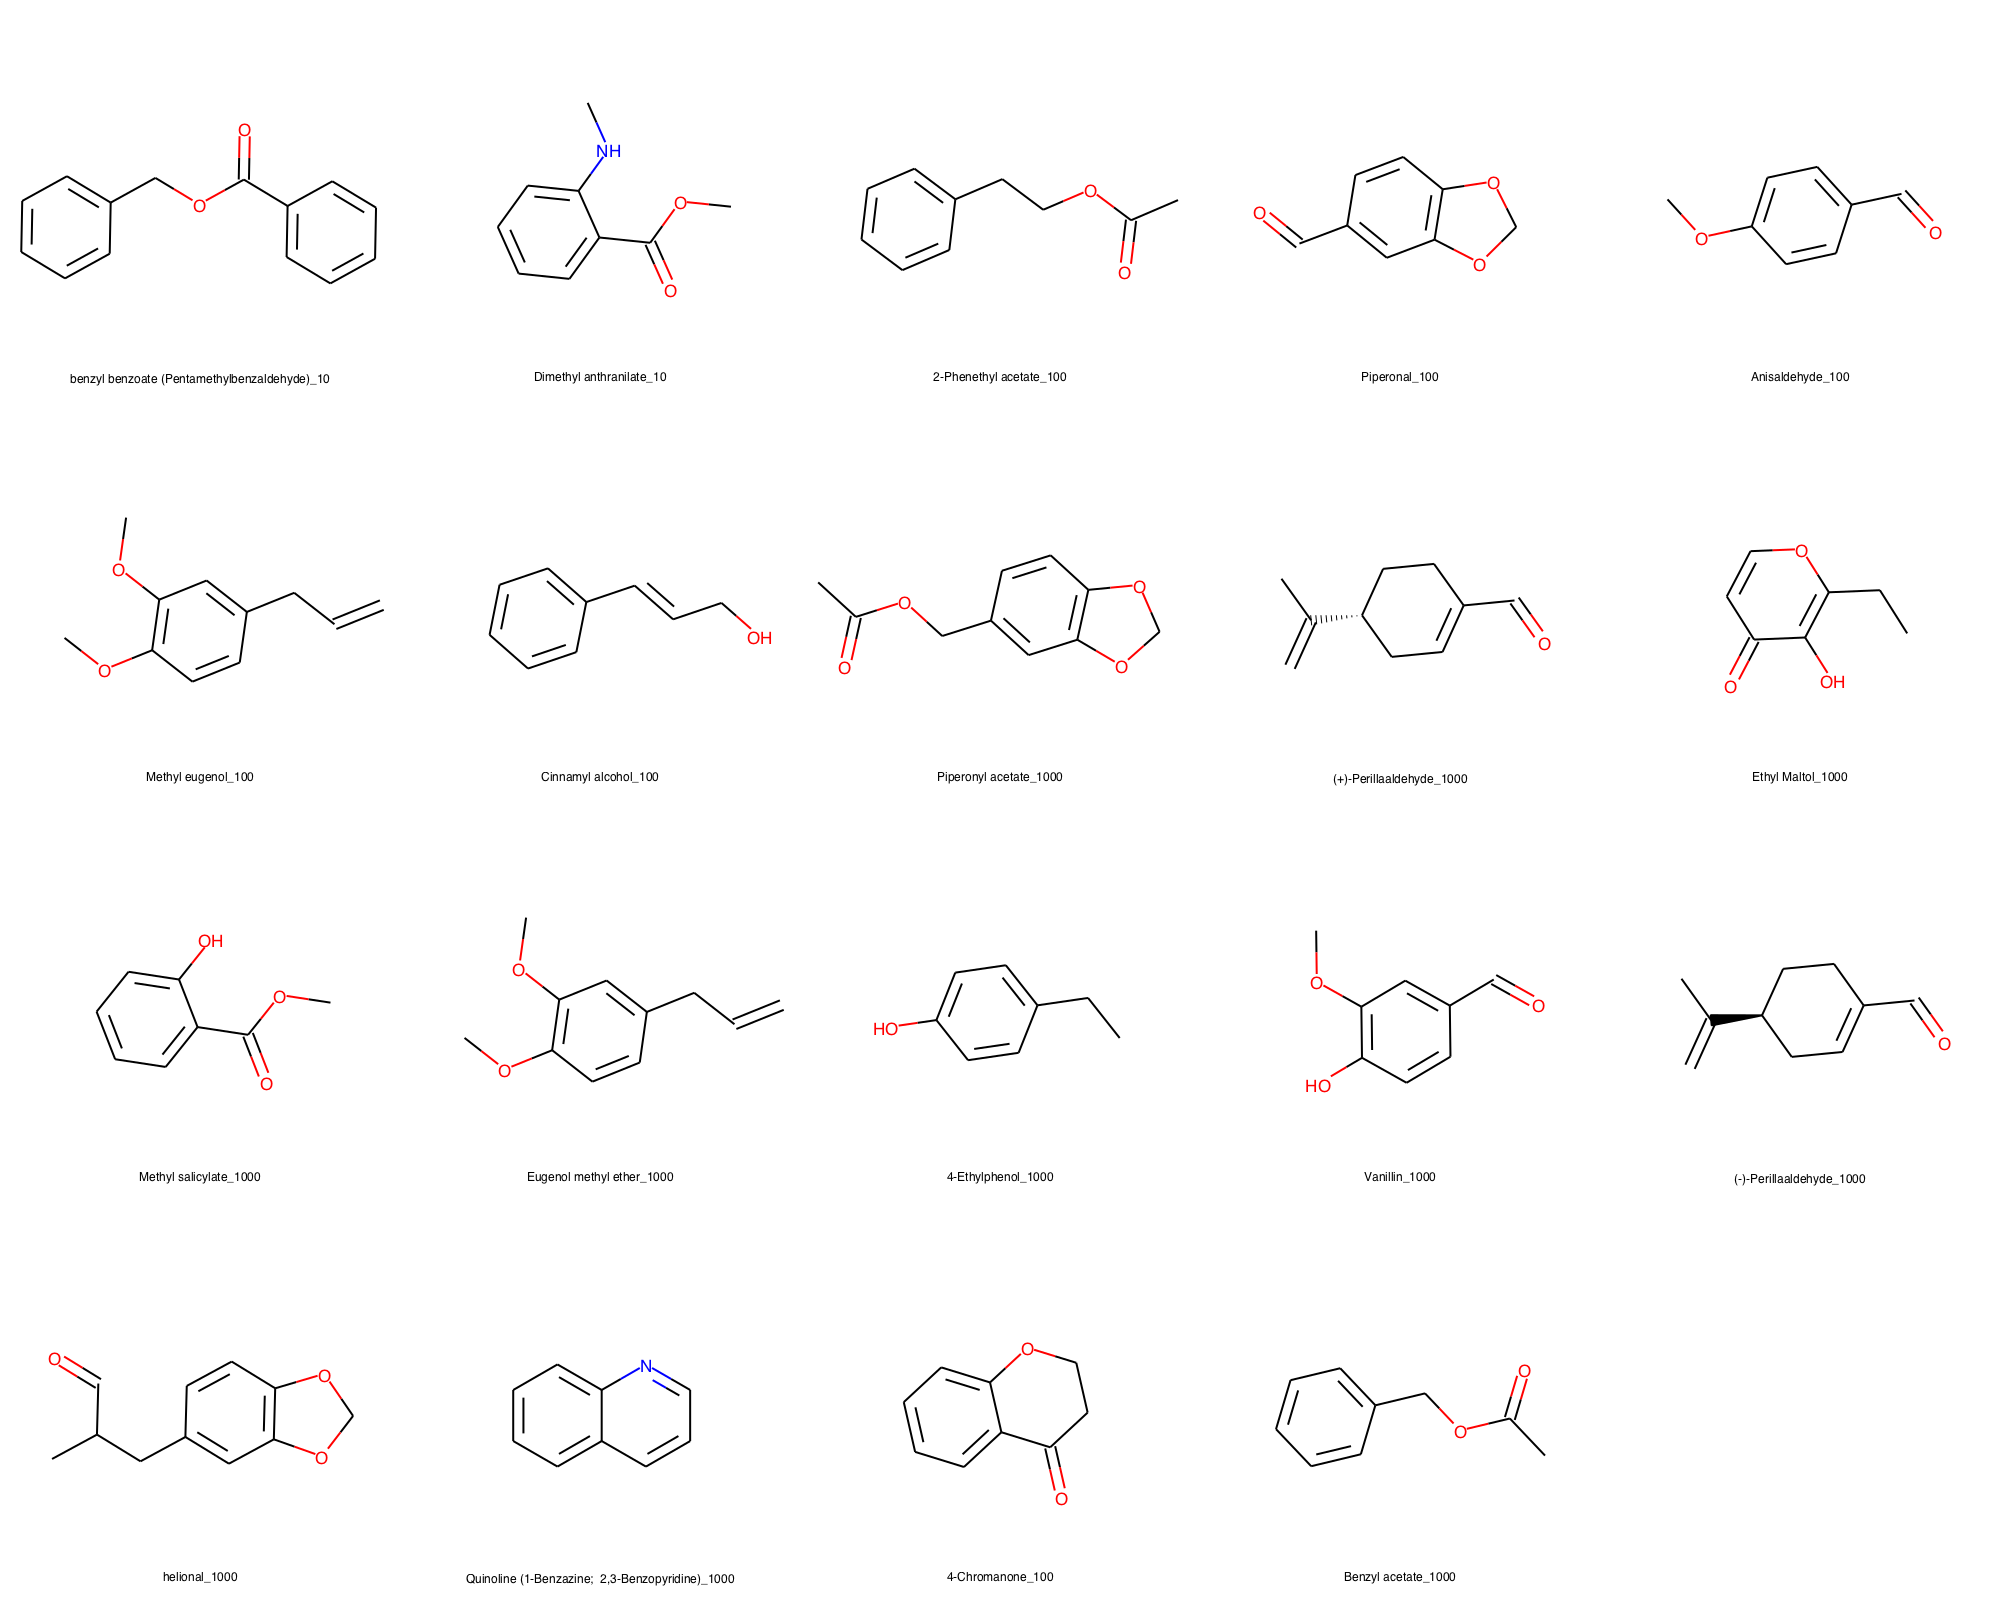

19_1


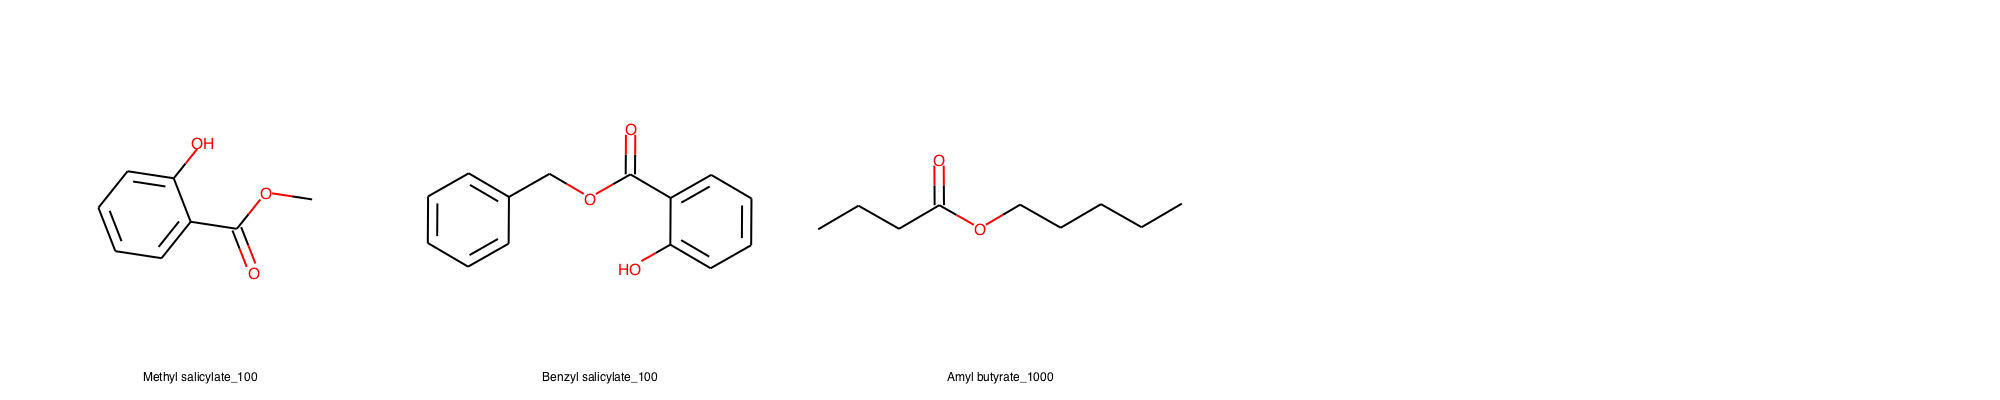

25_1


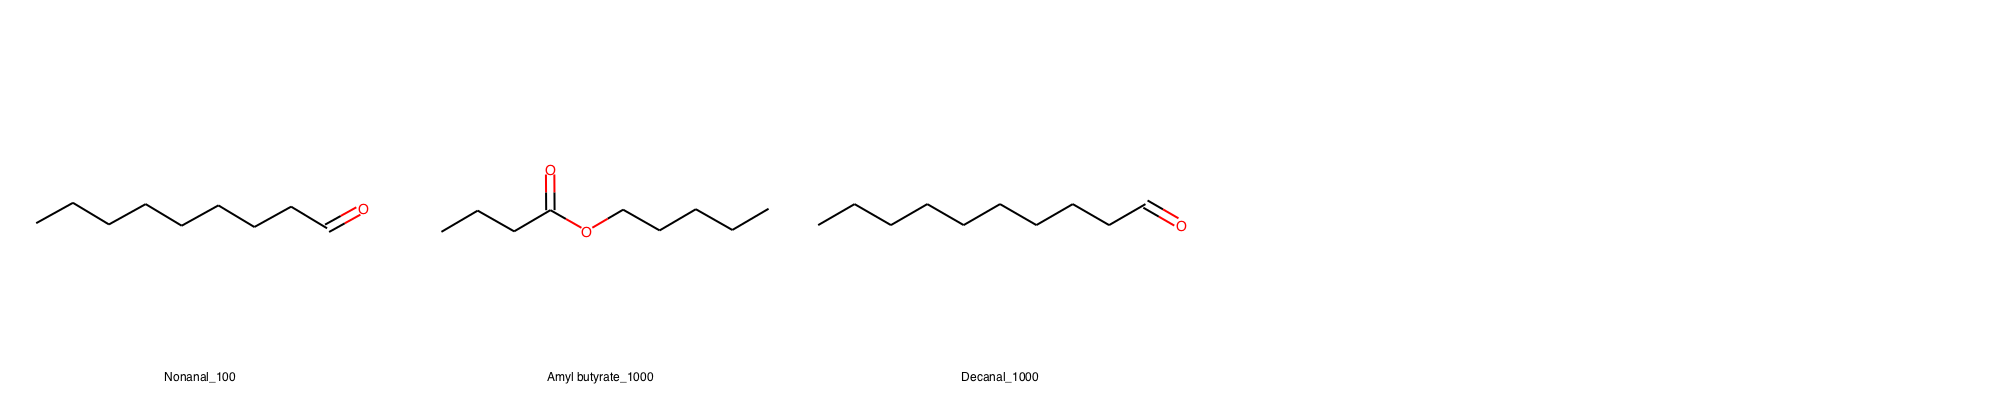

30_1


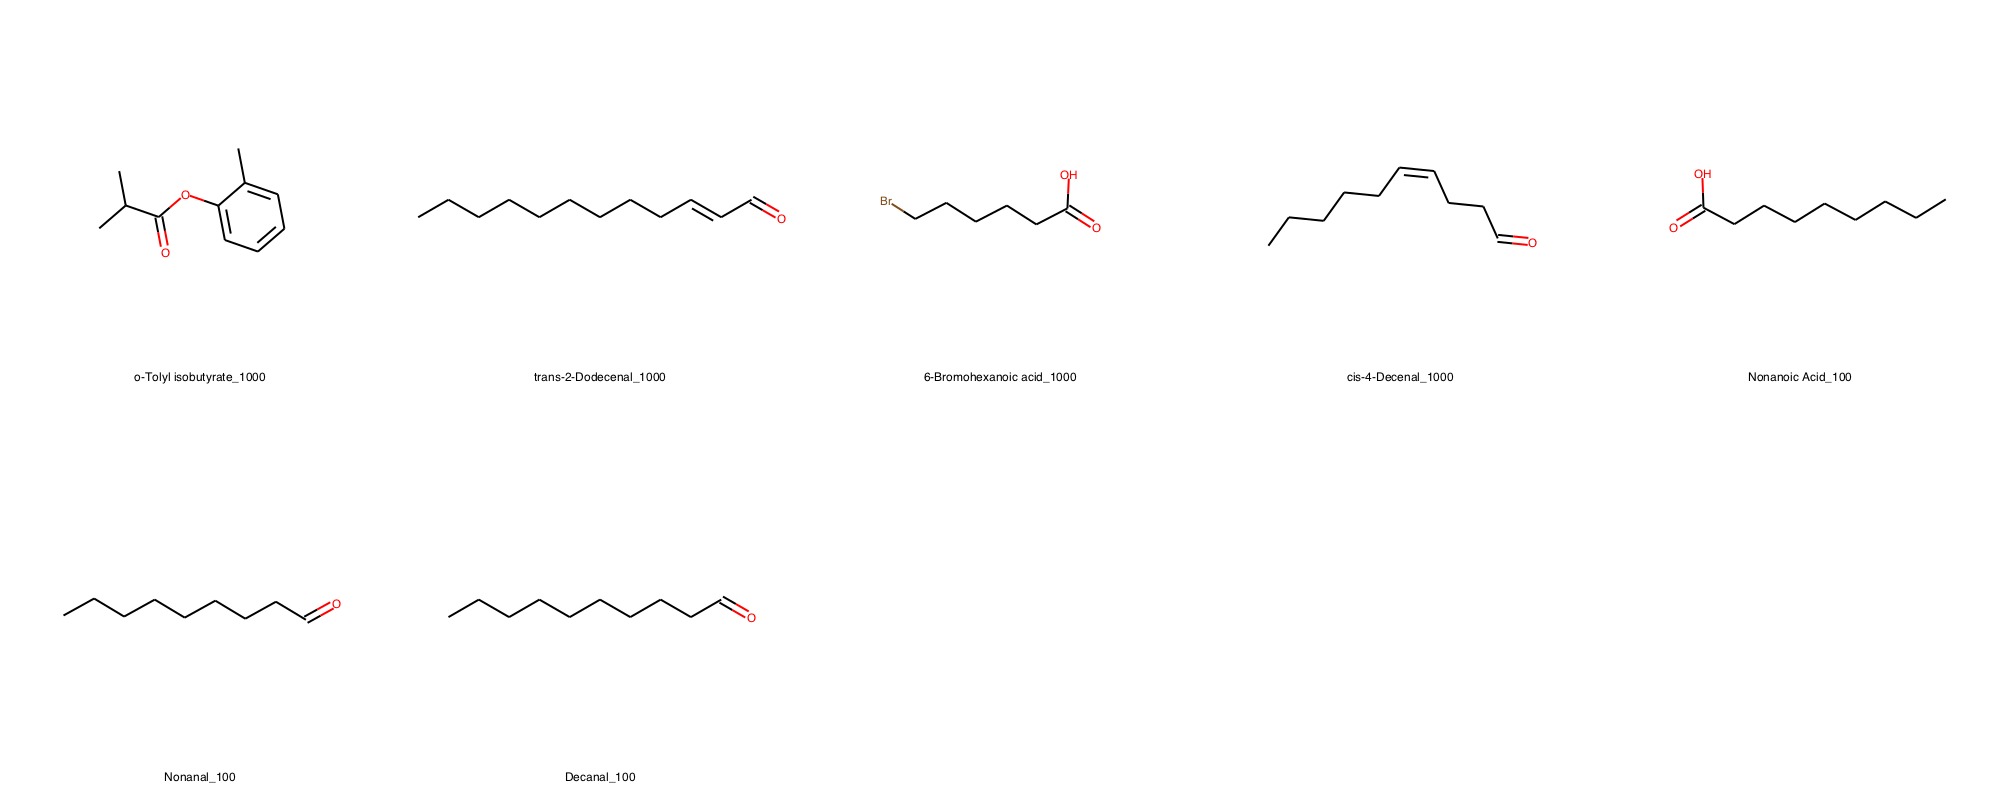

134_1


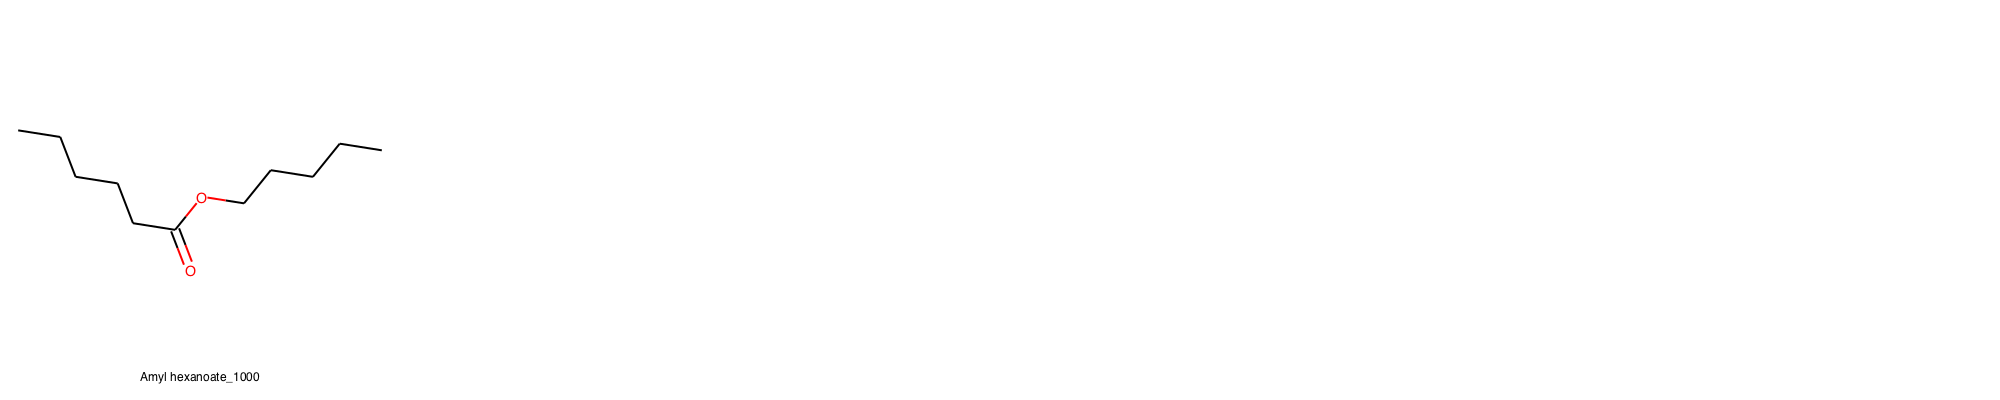

169_1


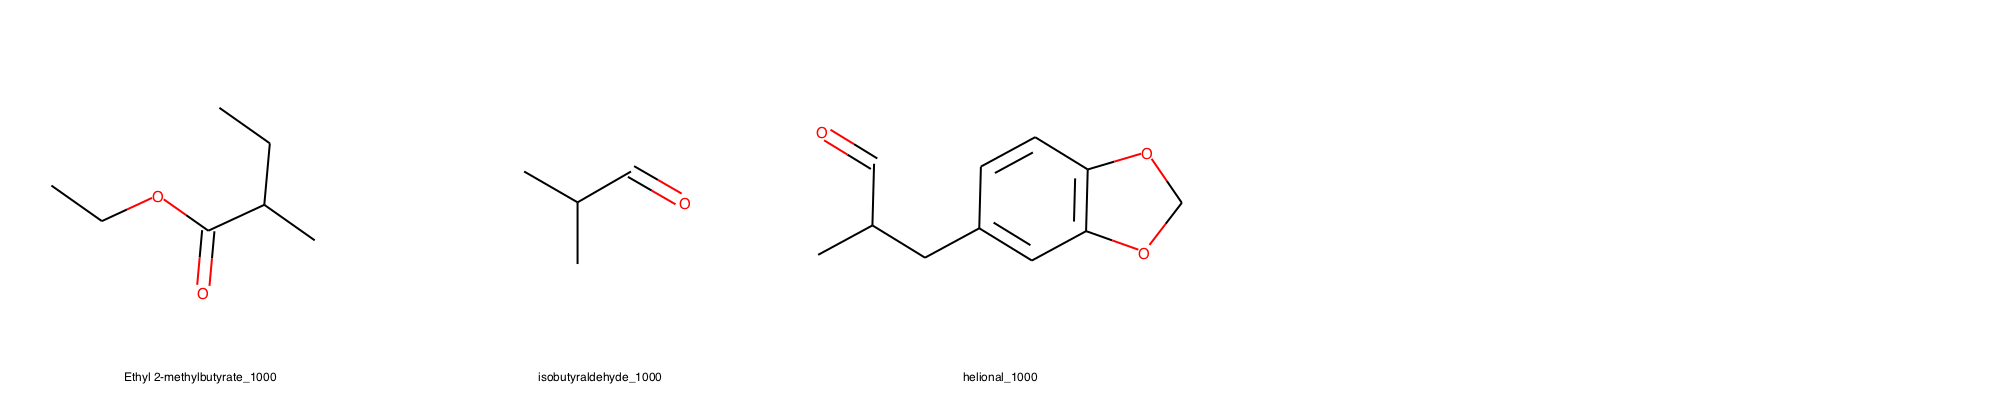

119_1


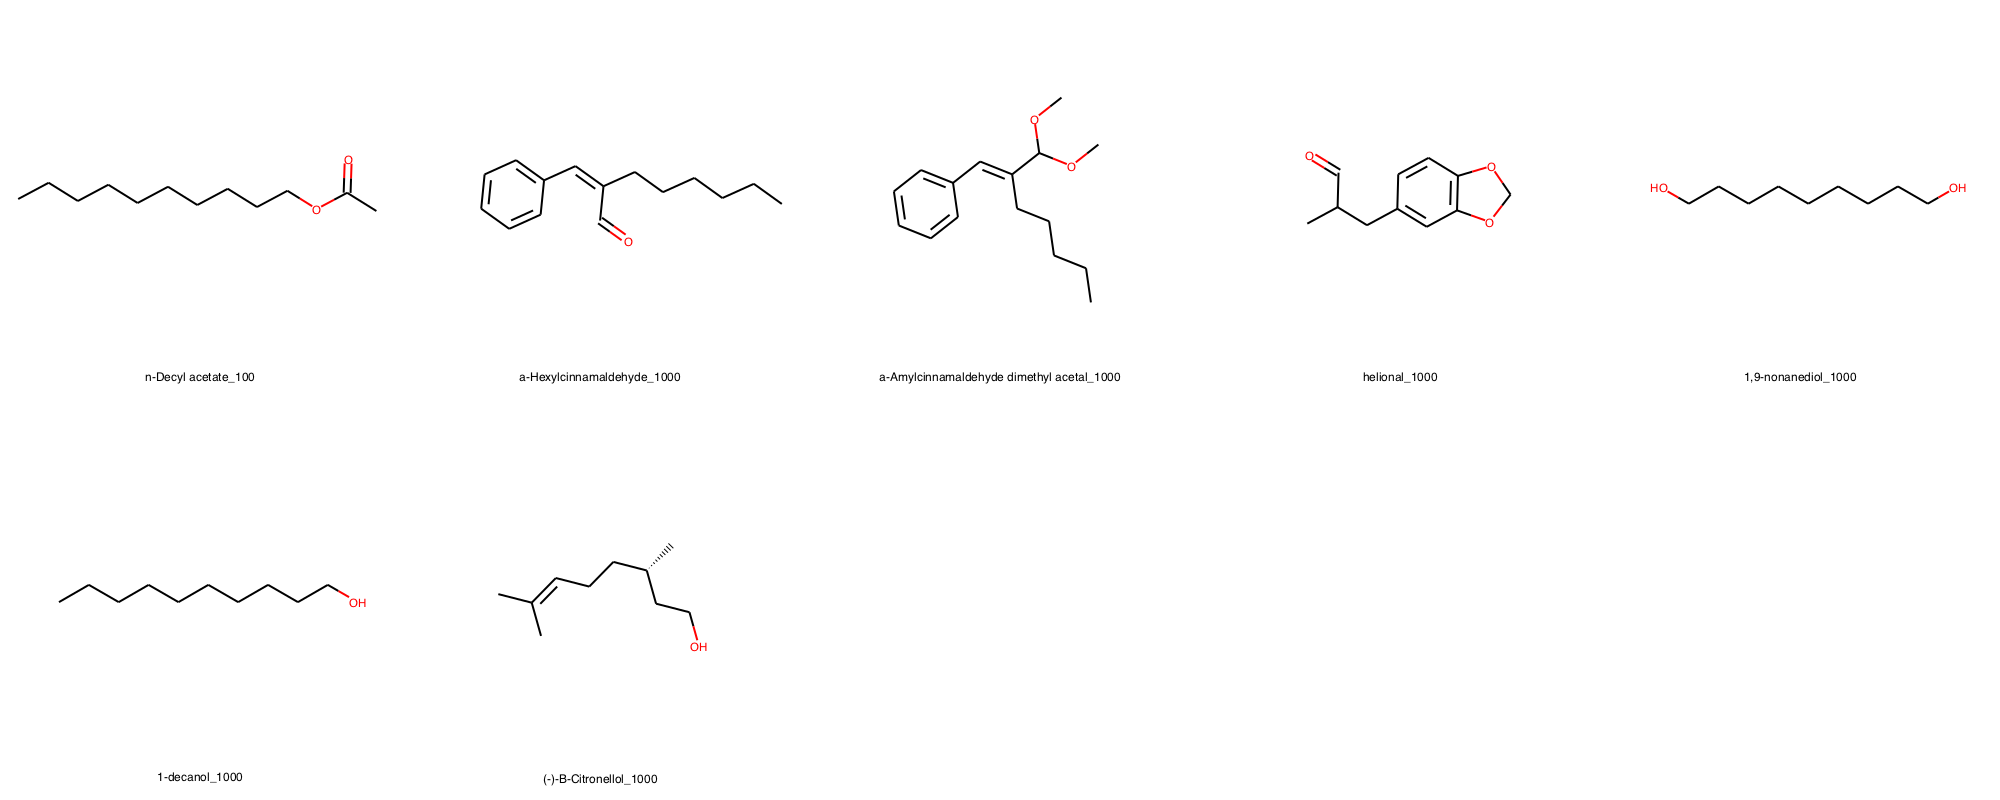

208_1


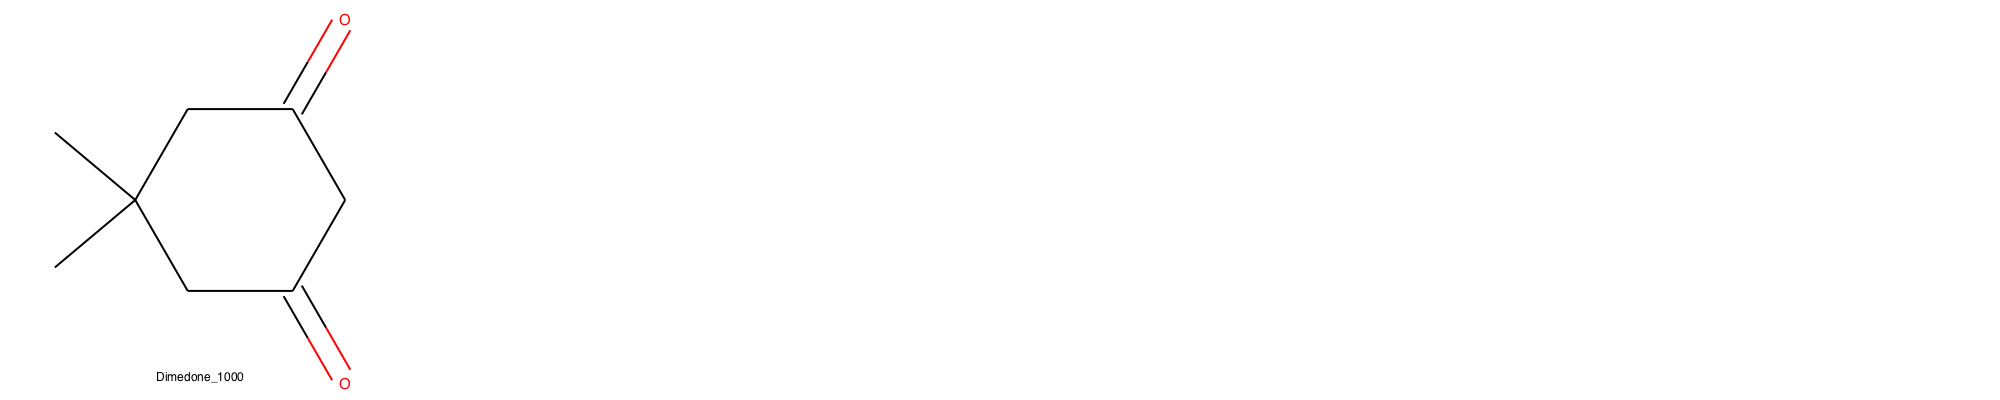

168_1


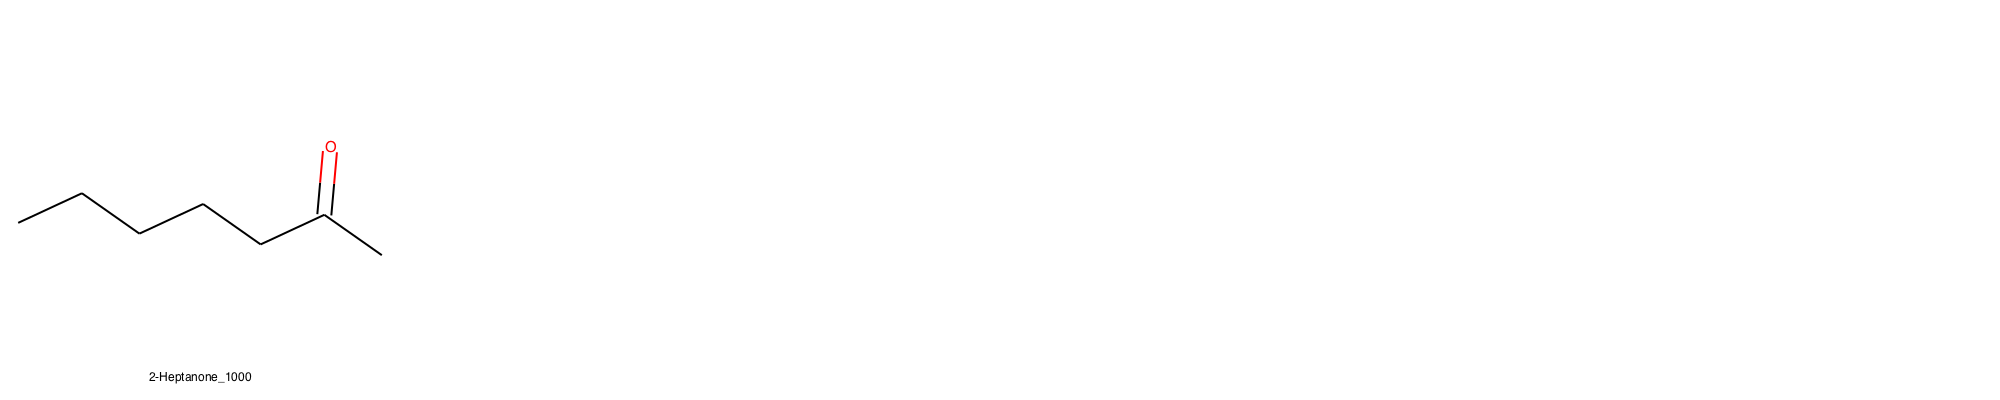

In [6]:
DrawingOptions.atomLabelFontSize=72
images = list()
for receptor, store in or_chems.items():
    print receptor
    display(Draw.MolsToGridImage([Chem.inchi.MolFromInchi(x[1]) for x in store], 
                                 legends=[x[0] + '_' + str(x[2]) for x in store], 
                                 molsPerRow=5, 
                                 maxMols=200,  
                                 subImgSize=(400, 400)))